# Hands-on Exploratory Data Analysis (EDA)

**EDA** is the initial step in data analysis, aimed at understanding the characteristics, structure, and patterns within a dataset before applying statistical modeling or machine learning.

EDA is typically carried out through:

- **Descriptive summaries** → simple statistics such as mean, median, standard deviation, and frequency counts.

- **Visualization** → plots (histograms, scatter plots, boxplots, heatmaps, etc.) to uncover patterns, relationships between variables, and anomalies.

# 0. Persiapan
1. Python library that'll be used are:
*   Pandas → for data manipulation and analysis
*   NumPy → for numerical computing
*   Matplotlib → for basic plotting and visualization
*   Seaborn → for advanced statistical data visualization

2. Dataset is from:

Kaggle: https://www.kaggle.com/datasets/nasirayub2/drone-based-malware-detection-dbmd






In [75]:
#Mount file dari google
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
%cd "/content/drive/MyDrive/STATPROB"

/content/drive/.shortcut-targets-by-id/1iN3iDZSNxZnebSMjWJnQM35kU2DzEeVc/STATPROB


In [77]:
# import requirements library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
# load dataset
data1 = pd.read_csv("/content/drive/MyDrive/STATPROB/DATASET/network_traffic_data.csv")
data2 = pd.read_csv("/content/drive/MyDrive/STATPROB/DATASET/malware_detection_data.csv")

# 1. Deskripsi Dataset
  - Jumlah observasi (baris) dan variabel (kolom)  
  - Tipe data setiap kolom (numerik, kategorikal, teks, tanggal, dll.)  
  - Informasi missing values  
  - Duplicate records  
  - Ringkasan statistik deskriptif (mean, median, min, max, std, dll.)  

## **1.1 Network Traffic Data**

In [79]:
# melihat sekilas data 5 row pertama
data1.head()

timestamp        source_ip  destination_ip  source_port  \
0  2024-06-28 19:02:55   86.230.134.129      3.46.98.34         3756   
1  2022-12-09 13:36:47   37.211.177.132   40.109.190.27        44591   
2  2022-08-22 04:59:38     54.129.79.47   77.250.43.217        43637   
3  2023-02-07 15:30:41    157.59.116.46  211.120.32.204        53440   
4  2020-12-08 21:06:49  161.125.154.101      62.15.8.89        46915   

   destination_port protocol  packet_length          payload_data flag  \
0             35357     ICMP            497   Theory hear parent.  ACK   
1             30823     ICMP            103  Trade indicate fill.  SYN   
2             60156      TCP            169        Political put.  FIN   
3             17944      UDP             51    Already really of.  SYN   
4              3390     ICMP            349     Least under sort.  ACK   

   traffic_volume  ...  ip_ttl  tcp_window_size     icmp_type  \
0       95.706008  ...     228            13100  echo_request   
1      209.420013  ...      64            39185    echo_reply   
2       68.588853  ...     181            45849    echo_reply   
3      218.471503  ...     157            32406    echo_reply   
4      712.184191  ...     228             5440    echo_reply   

   dns_query_count  dns_response_count  http_method  http_status_code  \
0                5                   3          GET               200   
1                4                   0          GET               500   
2                6                   3          PUT               301   
3                4                   4          PUT               500   
4                4                   8       DELETE               200   

       content_type  ssl_tls_version                   ssl_tls_cipher_suite  
0  application/json          TLS 1.2  TLS_ECDHE_RSA_WITH_AES_128_GCM_SHA256  
1  application/json          TLS 1.1           TLS_RSA_WITH_AES_128_CBC_SHA  
2  application/json          TLS 1.3  TLS_ECDHE_RSA_WITH_AES_128_GCM_SHA256  
3         text/html          TLS 1.3           TLS_RSA_WITH_AES_128_CBC_SHA  
4         text/html          TLS 1.0  TLS_ECDHE_RSA_WITH_AES_128_GCM_SHA256  

[5 rows x 30 columns]

In [80]:
# get the shape of the dataset
baris, kolom = data1.shape
print("baris:", baris)
print("kolom:", kolom)

baris: 200000
kolom: 30


In [81]:
# get info of the dataset
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   timestamp             200000 non-null  object 
 1   source_ip             200000 non-null  object 
 2   destination_ip        200000 non-null  object 
 3   source_port           200000 non-null  int64  
 4   destination_port      200000 non-null  int64  
 5   protocol              200000 non-null  object 
 6   packet_length         200000 non-null  int64  
 7   payload_data          200000 non-null  object 
 8   flag                  200000 non-null  object 
 9   traffic_volume        200000 non-null  float64
 10  flow_duration         200000 non-null  float64
 11  flow_bytes_per_s      200000 non-null  float64
 12  flow_packets_per_s    200000 non-null  float64
 13  packet_count          200000 non-null  int64  
 14  average_packet_size   200000 non-null  float64
 15  

In [82]:
# get statistical summary
exclude_cols = ['source_port', 'destination_port','http_status_code','ip_ttl'] # List the columns you DON'T want numeric stats for
data1.drop(columns=exclude_cols).describe() # Run describe only on the remaining numeric columns

packet_length  traffic_volume  flow_duration  flow_bytes_per_s  \
count  200000.000000   200000.000000  200000.000000     200000.000000   
mean      769.616195      500.114178     500.039276        500.076684   
std       421.442038      289.085972     288.439345        288.590810   
min        40.000000        0.001406       0.001422          0.022009   
25%       405.000000      249.778876     250.310140        250.572875   
50%       769.000000      500.169651     499.945739        499.963350   
75%      1135.000000      751.000848     748.884462        750.168943   
max      1499.000000      999.998001     999.996836        999.995845   

       flow_packets_per_s   packet_count  average_packet_size  \
count       200000.000000  200000.000000        200000.000000   
mean           500.659807      50.030170           770.887896   
std            288.476847      28.598199           421.525688   
min              0.001864       1.000000            40.005137   
25%            251.175043      25.000000           405.898694   
50%            501.760543      50.000000           771.526962   
75%            750.236044      75.000000          1136.386094   
max            999.998613      99.000000          1499.987460   

       min_packet_size  max_packet_size  packet_size_variance  header_length  \
count    200000.000000    200000.000000         200000.000000  200000.000000   
mean        772.029140       771.134485            500.367152      39.526345   
std         422.237390       421.054417            288.325124      11.551310   
min          40.007164        40.002885              0.007167      20.000000   
25%         406.461034       406.229140            251.131802      30.000000   
50%         772.168273       772.910756            501.131253      40.000000   
75%        1138.471259      1136.409339            750.153578      50.000000   
max        1499.994181      1499.993153            999.995611      59.000000   

       payload_length  tcp_window_size  dns_query_count  dns_response_count  
count   200000.000000    200000.000000    200000.000000       200000.000000  
mean       759.865035     32753.311520         4.501465            4.497935  
std        427.058987     18914.437835         2.869524            2.874835  
min         20.000000         1.000000         0.000000            0.000000  
25%        391.000000     16358.750000         2.000000            2.000000  
50%        760.000000     32715.000000         5.000000            5.000000  
75%       1129.000000     49156.000000         7.000000            7.000000  
max       1499.000000     65534.000000         9.000000            9.000000

### 1.1.1a **Mengekstrak Variabel Numerik & Histogram**

#### 1.1.1a.a **Port**
*   source_port
*   destination_port

In [83]:
# Check current data types (before conversion)
data1[['source_port', 'destination_port']].dtypes   # shows column types
# Convert ports to numeric
data1['source_port'] = pd.to_numeric(data1['source_port'], errors='coerce')
data1['destination_port'] = pd.to_numeric(data1['destination_port'], errors='coerce')
# Confirm the change
data1[['source_port', 'destination_port']].dtypes   # run this cell to display dtypes
# Basic descriptive statistics
data1[['source_port', 'destination_port']].describe()  # descriptive stats table
# Preview first few rows
data1[['source_port', 'destination_port']].head(10)   # first 10 rows

source_port  destination_port
0         3756             35357
1        44591             30823
2        43637             60156
3        53440             17944
4        46915              3390
5        22267             23290
6        31427              5798
7        33127             58597
8        43017             18707
9        58067             39211

#### 1.1.1a.b **Packet Sizes**
*   packet_lenght


In [84]:
# 2️⃣ Convert 'packet_length' to numeric
#    - errors='coerce' → non-numeric values (e.g. 'N/A') become NaN
data1['packet_length'] = pd.to_numeric(data1['packet_length'], errors='coerce')
# 3️⃣ Check type after conversion (should be float64 or Int64)
data1[['packet_length']].dtypes
# 4️⃣ View summary statistics
data1['packet_length'].describe()
# 5️⃣ Preview first few rows
data1[['packet_length']].head(10)

packet_length
0            497
1            103
2            169
3             51
4            349
5           1337
6            579
7           1024
8            355
9            238

#### 1.1.1a.c **Traffic volume / rates**
*   traffic_volume
*   flow_duration
*   flow_bytes_per_s
*   average_packet_size
*   min_packet_size
*   max_packet_size
*   packet_size_variance

In [85]:
# Columns from 1.1.1.c Traffic volume / rates
traffic_cols = ['traffic_volume','flow_duration','flow_bytes_per_s','average_packet_size','min_packet_size','max_packet_size','packet_size_variance']
# Convert all to numeric
# errors='coerce' -> any text/non-numeric will become NaN
data1[traffic_cols] = data1[traffic_cols].apply(pd.to_numeric, errors='coerce')
# Check dtypes to confirm numeric conversion
data1[traffic_cols].dtypes   # should show float64 or Int64
# 5Descriptive statistics for these variables
data1[traffic_cols].describe()

traffic_volume  flow_duration  flow_bytes_per_s  average_packet_size  \
count   200000.000000  200000.000000     200000.000000        200000.000000   
mean       500.114178     500.039276        500.076684           770.887896   
std        289.085972     288.439345        288.590810           421.525688   
min          0.001406       0.001422          0.022009            40.005137   
25%        249.778876     250.310140        250.572875           405.898694   
50%        500.169651     499.945739        499.963350           771.526962   
75%        751.000848     748.884462        750.168943          1136.386094   
max        999.998001     999.996836        999.995845          1499.987460   

       min_packet_size  max_packet_size  packet_size_variance  
count    200000.000000    200000.000000         200000.000000  
mean        772.029140       771.134485            500.367152  
std         422.237390       421.054417            288.325124  
min          40.007164        40.002885              0.007167  
25%         406.461034       406.229140            251.131802  
50%         772.168273       772.910756            501.131253  
75%        1138.471259      1136.409339            750.153578  
max        1499.994181      1499.993153            999.995611

#### 1.1.1a.d **Packet counts**
*   packet_count

In [86]:
# Convert 'packet_count' to numeric
# - errors='coerce' → non-numeric values (e.g. 'N/A') become NaN
data1['packet_count'] = pd.to_numeric(data1['packet_count'], errors='coerce')
# Check type after conversion (should be float64 or Int64)
data1[['packet_count']].dtypes
# View summary statistics
data1['packet_count'].describe()

count    200000.000000
mean         50.030170
std          28.598199
min           1.000000
25%          25.000000
50%          50.000000
75%          75.000000
max          99.000000
Name: packet_count, dtype: float64

#### 1.1.1a.e **Header & payload**
*   header_length
*   payload_length

In [87]:
# Convert 'header_length' & 'payload_length' to numeric
# - errors='coerce' → non-numeric values (e.g. 'N/A') become NaN
data1[['header_length','payload_length']] = data1[['header_length','payload_length']].apply(pd.to_numeric, errors='coerce')
# Check type after conversion (should be float64 or Int64)
data1[['header_length','payload_length']].dtypes
# View summary statistics
data1[['header_length','payload_length']].describe()

header_length  payload_length
count  200000.000000   200000.000000
mean       39.526345      759.865035
std        11.551310      427.058987
min        20.000000       20.000000
25%        30.000000      391.000000
50%        40.000000      760.000000
75%        50.000000     1129.000000
max        59.000000     1499.000000

#### 1.1.1a.f **Other metrics**
*   ip_ttl
*   tcp_window_size
*   dns_query_count
*   dns_response_count

##### 1.1.1.f.i **IP TTL (Time to Live)**

In [88]:
col = 'ip_ttl'
# Convert to numeric (if not already)
data1[col] = pd.to_numeric(data1[col], errors='coerce')
# Show frequency
print(f"\n🔹 Frequency of {col}")
freq_table = (
    data1[col]
    .value_counts(dropna=False)
    .sort_index()
    .to_frame(name='frequency')
)
display(freq_table)


🔹 Frequency of ip_ttl


frequency
ip_ttl           
1             780
2             824
3             792
4             782
5             760
...           ...
250           792
251           810
252           776
253           805
254           808

[254 rows x 1 columns]

##### 1.1.1.f.ii **TCP Window Size**

In [89]:
col = 'tcp_window_size'
# Convert to numeric (if not already)
data1[col] = pd.to_numeric(data1[col], errors='coerce')
# Show frequency
print(f"\n🔹 Frequency of {col}")
freq_table = (
    data1[col]
    .value_counts(dropna=False)
    .sort_index()
    .to_frame(name='frequency')
)
display(freq_table)


🔹 Frequency of tcp_window_size


frequency
tcp_window_size           
1                        2
2                        1
3                        3
4                        2
5                        2
...                    ...
65530                    3
65531                    1
65532                    3
65533                    6
65534                    4

[62423 rows x 1 columns]

##### 1.1.1.f.iii **DNS Query Count**

In [90]:
col = 'dns_query_count'
# Convert to numeric (if not already)
data1[col] = pd.to_numeric(data1[col], errors='coerce')
# Show frequency
print(f"\n🔹 Frequency of {col}")
freq_table = (
    data1[col]
    .value_counts(dropna=False)
    .sort_index()
    .to_frame(name='frequency')
)
display(freq_table)


🔹 Frequency of dns_query_count


frequency
dns_query_count           
0                    19957
1                    19972
2                    19894
3                    20109
4                    20036
5                    19936
6                    20043
7                    20059
8                    20235
9                    19759

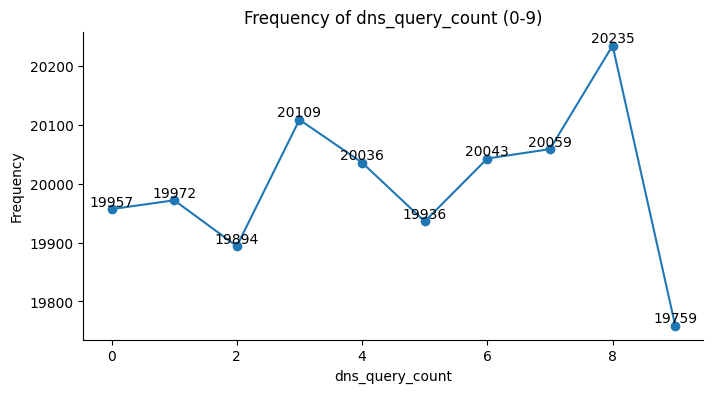

In [91]:


# Filter to only show values 0-9
filtered_freq = freq_table[(freq_table.index >= 0) & (freq_table.index <= 9)]

# Plot the line graph with dots
plt.figure(figsize=(8, 4))
plt.plot(filtered_freq.index, filtered_freq['frequency'], marker='o')
plt.title(f'Frequency of {col} (0-9)')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

# Add frequency values as annotations above the dots
for x, y in zip(filtered_freq.index, filtered_freq['frequency']):
    plt.text(x, y, str(y), ha='center', va='bottom')

plt.show()

##### 1.1.1.f.iv **DNS Response Count**

In [92]:
col = 'dns_response_count'
# Convert to numeric (if not already)
data1[col] = pd.to_numeric(data1[col], errors='coerce')
# Show frequency
print(f"\n🔹 Frequency of {col}")
freq_table = (
    data1[col]
    .value_counts(dropna=False)
    .sort_index()
    .to_frame(name='frequency')
)
display(freq_table)


🔹 Frequency of dns_response_count


frequency
dns_response_count           
0                       20211
1                       20062
2                       19744
3                       20014
4                       19784
5                       20092
6                       20201
7                       19955
8                       19925
9                       20012

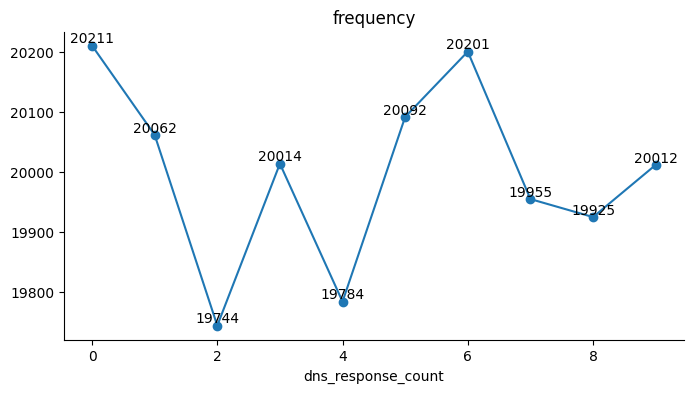

In [93]:
from matplotlib import pyplot as plt

# Filter dns_response_count to only show values 0-9
filtered_freq = freq_table[(freq_table.index >= 0) & (freq_table.index <= 9)]

# Plot the line graph with dots
ax = filtered_freq['frequency'].plot(kind='line', figsize=(8, 4), title='frequency', marker='o')
plt.gca().spines[['top', 'right']].set_visible(False)

# Add frequency values as annotations above the dots
for x, y in zip(filtered_freq.index, filtered_freq['frequency']):
    plt.text(x, y, str(y), ha='center', va='bottom')

plt.show()

#### 1.1.1.g **HTTP status code**
*   http_status_code

In [94]:
# Make sure the column name matches exactly!
col = 'http_status_code'

# Convert to numeric (if not already)
data1[col] = pd.to_numeric(data1[col], errors='coerce')

# Filter data to include only status codes 200, 301, 404, and 500
filtered_data = data1[data1[col].isin([200, 301, 404, 500])]

# Show frequency (count of each unique value) from the filtered data
freq_table = filtered_data[col].value_counts(dropna=False).sort_index().to_frame(name='frequency')

# Display in a nice table
display(freq_table)

frequency
http_status_code           
200                   50145
301                   49722
404                   50079
500                   50054

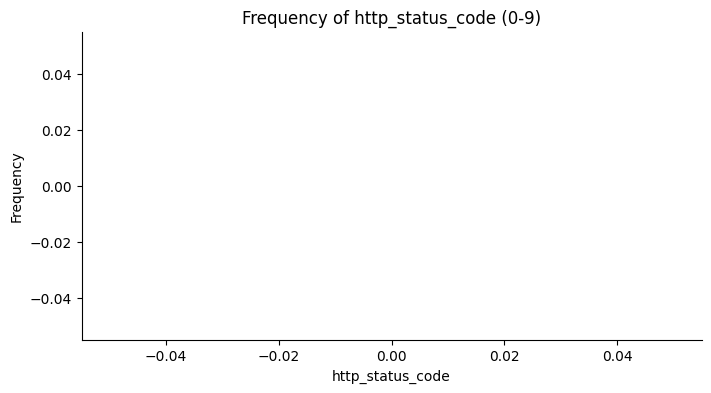

In [95]:

# Filter to only show values 0-9
filtered_freq = freq_table[(freq_table.index >= 0) & (freq_table.index <= 9)]

# Plot the line graph with dots
plt.figure(figsize=(8, 4))
plt.plot(filtered_freq.index, filtered_freq['frequency'], marker='o')
plt.title(f'Frequency of {col} (0-9)')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

# Add frequency values as annotations above the dots
for x, y in zip(filtered_freq.index, filtered_freq['frequency']):
    plt.text(x, y, str(y), ha='center', va='bottom')

plt.show()

### 1.1.1b **Mengekstrak Variabel Kategorikal & Histogram**

#### 1.1.1b.a Protocol

In [96]:
freq_table = (
    data1['protocol']
    .value_counts(dropna=False)    # count all categories, include NaN
    .sort_index()                  # sort alphabetically or numerically
    .to_frame(name='frequency')
)

# Just display it as a normal DataFrame
freq_table

frequency
protocol           
ICMP          66259
TCP           67127
UDP           66614

#### 1.1.1b.b Flag

In [97]:
# Frequency table of flag (clean table output)
flag_freq = (
    data1['flag']
    .value_counts(dropna=False)    # count all categories, include NaN
    .sort_index()                  # sort alphabetically (ACK, FIN, SYN, etc.)
    .to_frame(name='frequency')
)

# Display as a normal DataFrame
flag_freq


frequency
flag           
ACK       49767
FIN       49793
RST       50306
SYN       50134

#### 1.1.1b.c ssl_tls_version

In [98]:
# Frequency table for ssl_tls_version
ssl_tls_freq = (
    data1['ssl_tls_version']
    .value_counts(dropna=False)    # include NaN if any
    .sort_index()                  # sort alphabetically (e.g., TLS1.2, TLS1.3)
    .to_frame(name='frequency')
)

# Display as a normal DataFrame
ssl_tls_freq


frequency
ssl_tls_version           
TLS 1.0              49958
TLS 1.1              50088
TLS 1.2              50134
TLS 1.3              49820

#### 1.1.1b.d Timestamp Kategori

In [99]:
data1['timestamp'] = pd.to_datetime(data1['timestamp'], errors='coerce')
data1['year']  = data1['timestamp'].dt.year
data1['month'] = data1['timestamp'].dt.month
data1['day']   = data1['timestamp'].dt.day
data1['hour']  = data1['timestamp'].dt.hour

##### 1.1.1b.d.i Frequency by Year

In [100]:
# Frequency by Year
print("Frequency by Year:")
year_freq = (
    data1['year']
    .value_counts(dropna=False)
    .sort_index()
    .to_frame(name='frequency')
)
display(year_freq)

Frequency by Year:


frequency
year           
2020      43924
2021      43932
2022      43503
2023      43718
2024      24923

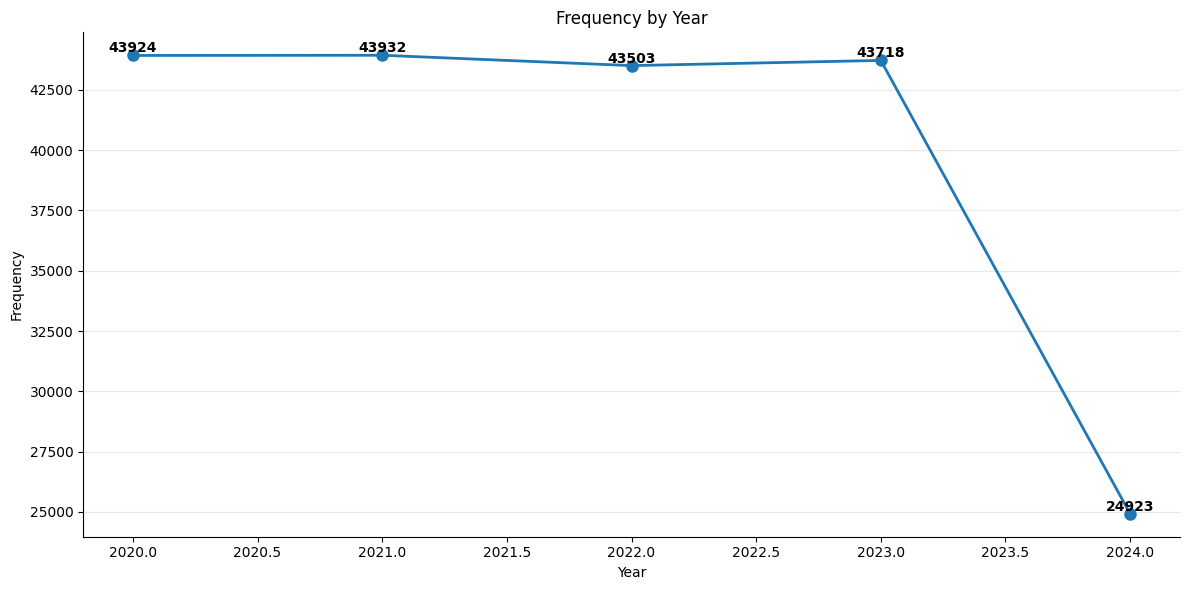

In [101]:
# Plot the line graph with dots
plt.figure(figsize=(12, 6))
plt.plot(year_freq.index, year_freq['frequency'], marker='o', linewidth=2, markersize=8)
plt.title('Frequency by Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

# Add frequency values as annotations above the dots
for x, y in zip(year_freq.index, year_freq['frequency']):
    plt.text(x, y, str(y), ha='center', va='bottom', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

##### 1.1.1b.d.ii Frequency by Month

In [102]:
# Frequency by Month
print("\nFrequency by Month:")
month_freq = (
    data1['month']
    .value_counts(dropna=False)
    .sort_index()
    .to_frame(name='frequency')
)
display(month_freq)


Frequency by Month:


frequency
month           
1          18579
2          16943
3          18676
4          18032
5          18501
6          17878
7          18062
8          14646
9          14444
10         14960
11         14416
12         14863

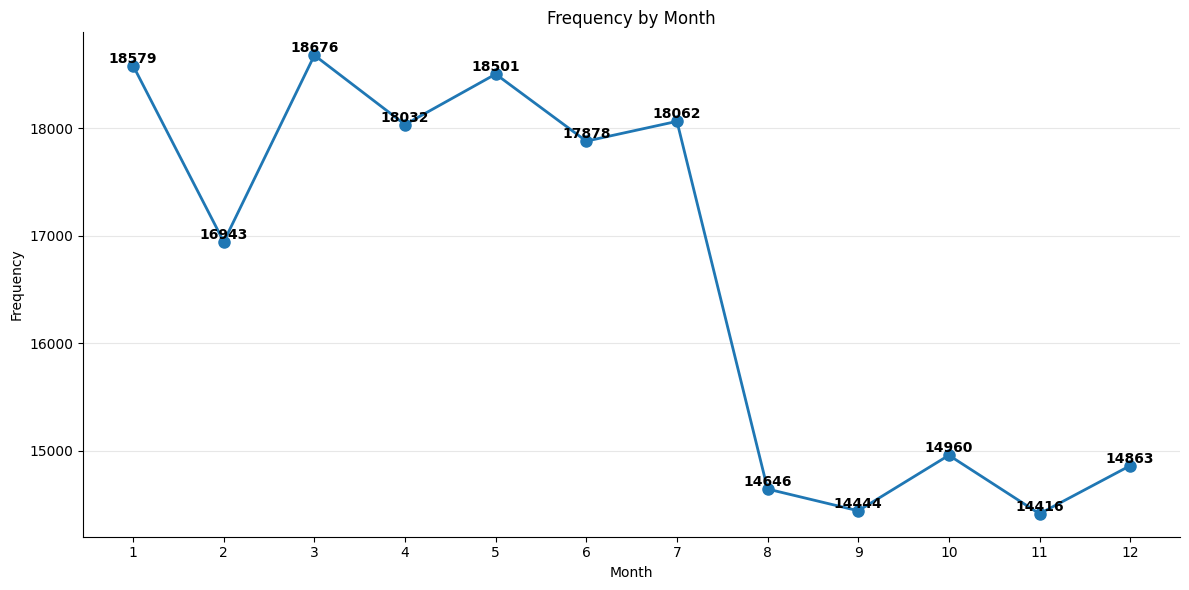

In [103]:
# Plot the line graph with dots
plt.figure(figsize=(12, 6))
plt.plot(month_freq.index, month_freq['frequency'], marker='o', linewidth=2, markersize=8)
plt.title('Frequency by Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

# Set x-axis to show all months (1-12)
plt.xticks(range(1, 13))

# Add frequency values as annotations above the dots
for x, y in zip(month_freq.index, month_freq['frequency']):
    plt.text(x, y, str(y), ha='center', va='bottom', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

##### 1.1.1b.d.iii Frequency by Day

In [104]:
# Frequency by Day
print("\nFrequency by Day:")
day_freq = (
    data1['day']
    .value_counts(dropna=False)
    .sort_index()
    .to_frame(name='frequency')
)
display(day_freq)


Frequency by Day:


frequency
day           
1         6431
2         6534
3         6555
4         6515
5         6788
6         6561
7         6555
8         6632
9         6610
10        6510
11        6672
12        6567
13        6631
14        6526
15        6706
16        6664
17        6642
18        6568
19        6632
20        6417
21        6672
22        6497
23        6586
24        6607
25        6699
26        6627
27        6587
28        6480
29        6160
30        5726
31        3643

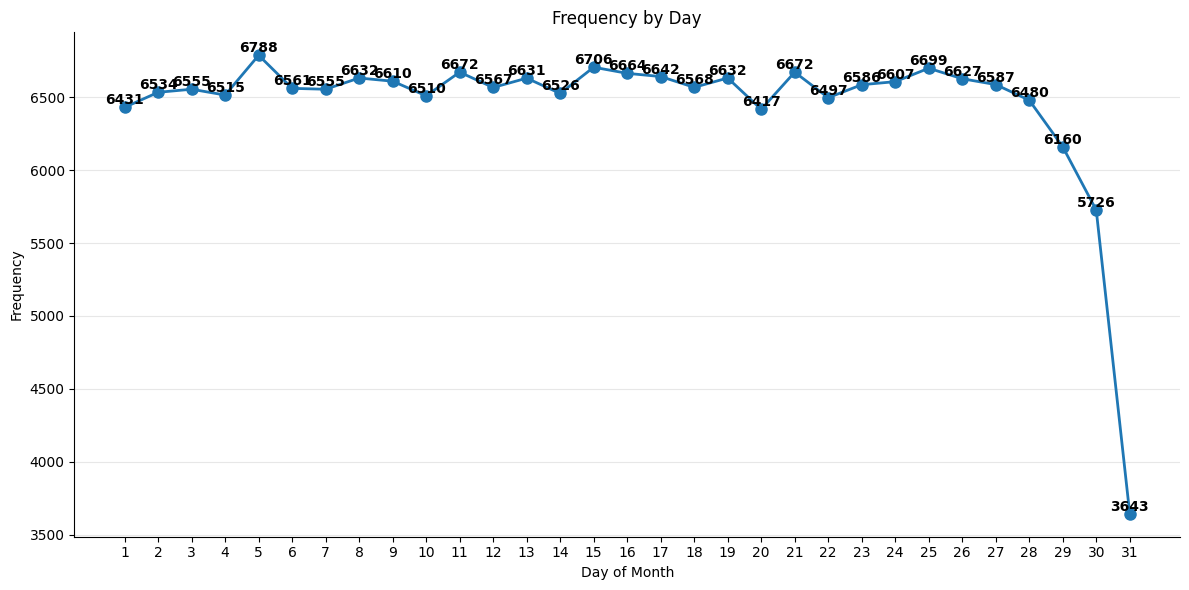

In [105]:
# Plot the line graph with dots
plt.figure(figsize=(12, 6))
plt.plot(day_freq.index, day_freq['frequency'], marker='o', linewidth=2, markersize=8)
plt.title('Frequency by Day')
plt.xlabel('Day of Month')
plt.ylabel('Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

# Set x-axis to show all days (1-31)
plt.xticks(range(1, 32))

# Add frequency values as annotations above the dots
for x, y in zip(day_freq.index, day_freq['frequency']):
    plt.text(x, y, str(y), ha='center', va='bottom', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

##### 1.1.1b.d.iv Frequency by Hour

In [106]:
# Frequency by Hour
print("\nFrequency by Hour:")
hour_freq = (
    data1['hour']
    .value_counts(dropna=False)
    .sort_index()
    .to_frame(name='frequency')
)
display(hour_freq)


Frequency by Hour:


frequency
hour           
0          8418
1          8308
2          8421
3          8177
4          8309
5          8422
6          8311
7          8315
8          8420
9          8325
10         8322
11         8281
12         8190
13         8342
14         8305
15         8341
16         8323
17         8449
18         8304
19         8372
20         8424
21         8259
22         8304
23         8358

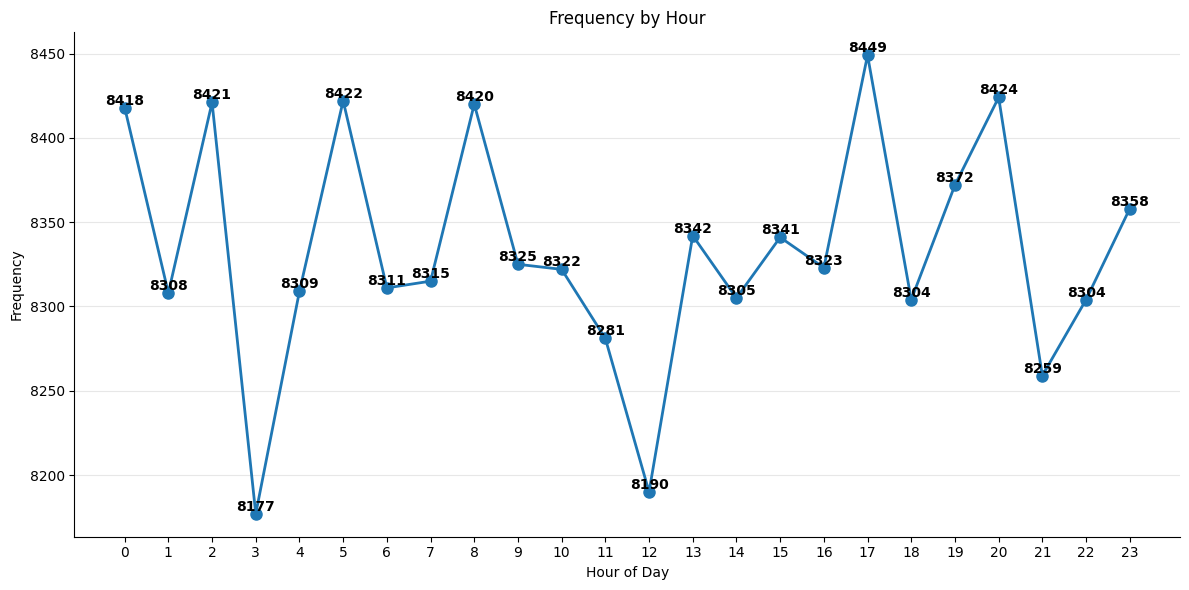

In [107]:
# Plot the line graph with dots
plt.figure(figsize=(12, 6))
plt.plot(hour_freq.index, hour_freq['frequency'], marker='o', linewidth=2, markersize=8)
plt.title('Frequency by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

# Set x-axis to show all hours (0-23)
plt.xticks(range(0, 24))

# Add frequency values as annotations above the dots
for x, y in zip(hour_freq.index, hour_freq['frequency']):
    plt.text(x, y, str(y), ha='center', va='bottom', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

#### 1.1.1b.e content_type

In [108]:
# Frequency table of content_type (clean table output)
content_type_freq = (
    data1['content_type']
    .value_counts(dropna=False)   # include NaN if any
    .sort_index()                 # sort alphabetically
    .to_frame(name='frequency')
)

content_type_freq   # shows as a normal table in Colab/Jupyter

frequency
content_type               
application/json      66534
image/png             66388
text/html             67078

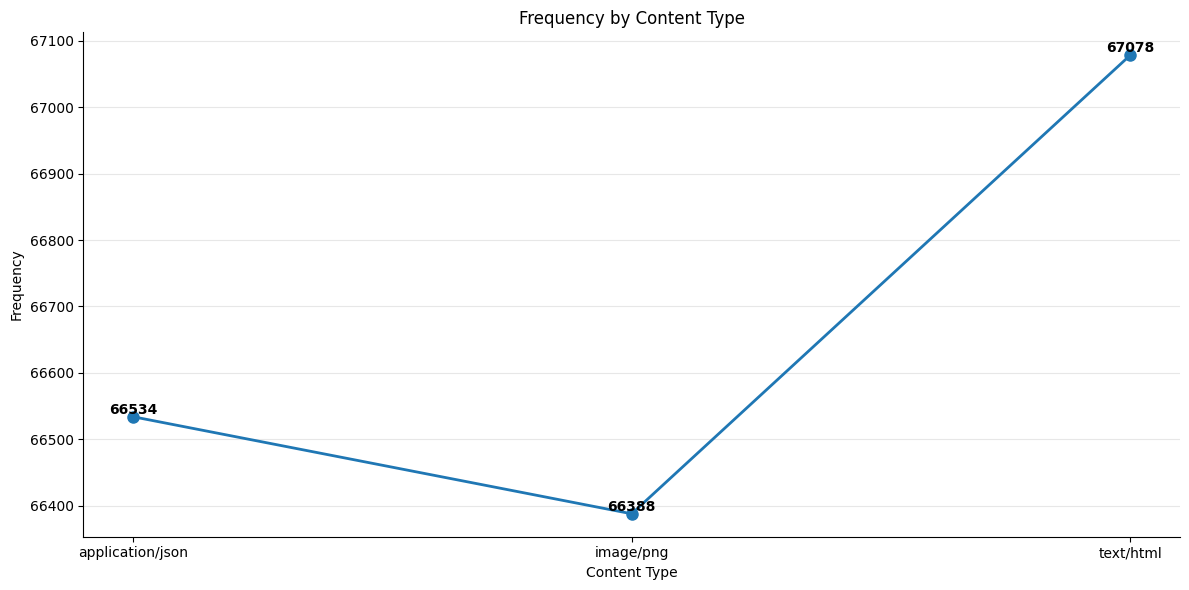

In [109]:
# Plot the line graph with dots
plt.figure(figsize=(12, 6))
plt.plot(content_type_freq.index, content_type_freq['frequency'], marker='o', linewidth=2, markersize=8)
plt.title('Frequency by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

# Add frequency values as annotations above the dots
for x, y in zip(content_type_freq.index, content_type_freq['frequency']):
    plt.text(x, y, str(y), ha='center', va='bottom', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

#### 1.1.1b.f http_method

In [110]:
# Frequency table of http_method (clean table output)
http_method_freq = (
    data1['http_method']
    .value_counts(dropna=False)   # include NaN if any
    .sort_index()                 # sort alphabetically
    .to_frame(name='frequency')
)

http_method_freq   # shows as a normal table in Colab/Jupyter

frequency
http_method           
DELETE           49980
GET              49869
POST             49795
PUT              50356

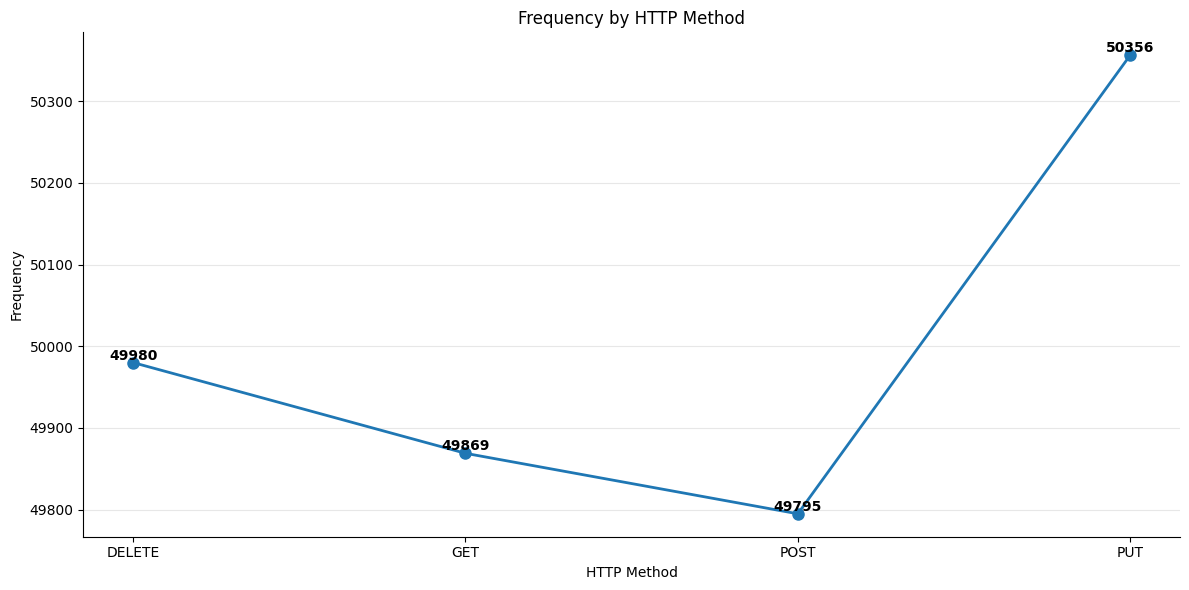

In [111]:
# Plot the line graph with dots
plt.figure(figsize=(12, 6))
plt.plot(http_method_freq.index, http_method_freq['frequency'], marker='o', linewidth=2, markersize=8)
plt.title('Frequency by HTTP Method')
plt.xlabel('HTTP Method')
plt.ylabel('Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

# Add frequency values as annotations above the dots
for x, y in zip(http_method_freq.index, http_method_freq['frequency']):
    plt.text(x, y, str(y), ha='center', va='bottom', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### 1.1.2 Label Encoding: Otomatis vs Manual Mapping

| Metode             | Kelebihan                               | Kekurangan                                             |
| ------------------ | --------------------------------------- | ------------------------------------------------------ |
| **LabelEncoder**   | Otomatis, cepat, bisa inverse transform | Urutan angka bisa berubah, tidak transparan            |
| **Mapping Manual** | Kendali penuh, konsisten, jelas         | Perlu ditulis manual, rawan error jika kategori banyak |

In [112]:
from sklearn.preprocessing import LabelEncoder

# Copy dataset biar tidak menimpa yang asli
encoded_df = data2.copy()

# Pilih kolom kategorikal
categorical_cols = data2.select_dtypes(include=['object']).columns

# Lakukan Label Encoding untuk tiap kolom kategorikal
le = LabelEncoder()
for col in categorical_cols:
    encoded_df[col] = le.fit_transform(data2[col])

print("📊 Dataset setelah Label Encoding (head):")
display(encoded_df.head())

📊 Dataset setelah Label Encoding (head):


anomaly_score  suspicious_ip_count  malicious_payload_indicator  \
0       0.687331                    5                            1   
1       0.519249                    2                            1   
2       0.363944                    7                            0   
3       0.890735                    9                            0   
4       0.686994                    8                            0   

   reputation_score  behavioral_score  attack_type  signature_match  \
0         82.673157         24.141808            1                1   
1         27.140515         69.788583            2                1   
2         21.243343         53.630703            2                0   
3         76.188191         41.066927            2                1   
4         12.935845          6.254213            0                0   

   sandbox_result  heuristic_score  traffic_pattern  
0               1         3.952639                0  
1               0        57.429668                1  
2               0        98.507689                1  
3               1        40.119337                1  
4               0        79.303526                1

In [113]:
# get statistical summary
data1.describe().round(2)

timestamp  source_port  destination_port  \
count                         200000    200000.00         200000.00   
mean   2022-04-13 22:20:30.613399808     33227.25          33293.50   
min              2020-01-01 00:09:44      1024.00           1024.00   
25%    2021-02-21 03:01:20.750000128     17075.00          17126.00   
50%              2022-04-13 01:32:50     33174.00          33344.00   
75%    2023-06-06 18:04:00.249999872     49378.25          49435.00   
max              2024-07-27 14:59:20     65534.00          65534.00   
std                              NaN     18627.85          18626.16   

       packet_length  traffic_volume  flow_duration  flow_bytes_per_s  \
count      200000.00       200000.00      200000.00         200000.00   
mean          769.62          500.11         500.04            500.08   
min            40.00            0.00           0.00              0.02   
25%           405.00          249.78         250.31            250.57   
50%           769.00          500.17         499.95            499.96   
75%          1135.00          751.00         748.88            750.17   
max          1499.00         1000.00        1000.00           1000.00   
std           421.44          289.09         288.44            288.59   

       flow_packets_per_s  packet_count  average_packet_size  ...  \
count           200000.00     200000.00            200000.00  ...   
mean               500.66         50.03               770.89  ...   
min                  0.00          1.00                40.01  ...   
25%                251.18         25.00               405.90  ...   
50%                501.76         50.00               771.53  ...   
75%                750.24         75.00              1136.39  ...   
max               1000.00         99.00              1499.99  ...   
std                288.48         28.60               421.53  ...   

       payload_length     ip_ttl  tcp_window_size  dns_query_count  \
count       200000.00  200000.00        200000.00        200000.00   
mean           759.87     127.35         32753.31             4.50   
min             20.00       1.00             1.00             0.00   
25%            391.00      64.00         16358.75             2.00   
50%            760.00     127.00         32715.00             5.00   
75%           1129.00     191.00         49156.00             7.00   
max           1499.00     254.00         65534.00             9.00   
std            427.06      73.41         18914.44             2.87   

       dns_response_count  http_status_code       year      month        day  \
count           200000.00         200000.00  200000.00  200000.00  200000.00   
mean                 4.50            351.27    2021.81       6.20      15.70   
min                  0.00            200.00    2020.00       1.00       1.00   
25%                  2.00            200.00    2021.00       3.00       8.00   
50%                  5.00            404.00    2022.00       6.00      16.00   
75%                  7.00            500.00    2023.00       9.00      23.00   
max                  9.00            500.00    2024.00      12.00      31.00   
std                  2.87            112.24       1.33       3.41       8.77   

            hour  
count  200000.00  
mean       11.50  
min         0.00  
25%         5.00  
50%        11.00  
75%        18.00  
max        23.00  
std         6.93  

[8 rows x 24 columns]

In [114]:
# checking missing values
data1.isnull().sum()

timestamp               0
source_ip               0
destination_ip          0
source_port             0
destination_port        0
protocol                0
packet_length           0
payload_data            0
flag                    0
traffic_volume          0
flow_duration           0
flow_bytes_per_s        0
flow_packets_per_s      0
packet_count            0
average_packet_size     0
min_packet_size         0
max_packet_size         0
packet_size_variance    0
header_length           0
payload_length          0
ip_ttl                  0
tcp_window_size         0
icmp_type               0
dns_query_count         0
dns_response_count      0
http_method             0
http_status_code        0
content_type            0
ssl_tls_version         0
ssl_tls_cipher_suite    0
year                    0
month                   0
day                     0
hour                    0
dtype: int64

In [115]:
# total baris duplikat
print("Total duplicate rows:", data1.duplicated().sum())

Total duplicate rows: 0


In [116]:
# get statistical summary
data1.describe().round(2)

timestamp  source_port  destination_port  \
count                         200000    200000.00         200000.00   
mean   2022-04-13 22:20:30.613399808     33227.25          33293.50   
min              2020-01-01 00:09:44      1024.00           1024.00   
25%    2021-02-21 03:01:20.750000128     17075.00          17126.00   
50%              2022-04-13 01:32:50     33174.00          33344.00   
75%    2023-06-06 18:04:00.249999872     49378.25          49435.00   
max              2024-07-27 14:59:20     65534.00          65534.00   
std                              NaN     18627.85          18626.16   

       packet_length  traffic_volume  flow_duration  flow_bytes_per_s  \
count      200000.00       200000.00      200000.00         200000.00   
mean          769.62          500.11         500.04            500.08   
min            40.00            0.00           0.00              0.02   
25%           405.00          249.78         250.31            250.57   
50%           769.00          500.17         499.95            499.96   
75%          1135.00          751.00         748.88            750.17   
max          1499.00         1000.00        1000.00           1000.00   
std           421.44          289.09         288.44            288.59   

       flow_packets_per_s  packet_count  average_packet_size  ...  \
count           200000.00     200000.00            200000.00  ...   
mean               500.66         50.03               770.89  ...   
min                  0.00          1.00                40.01  ...   
25%                251.18         25.00               405.90  ...   
50%                501.76         50.00               771.53  ...   
75%                750.24         75.00              1136.39  ...   
max               1000.00         99.00              1499.99  ...   
std                288.48         28.60               421.53  ...   

       payload_length     ip_ttl  tcp_window_size  dns_query_count  \
count       200000.00  200000.00        200000.00        200000.00   
mean           759.87     127.35         32753.31             4.50   
min             20.00       1.00             1.00             0.00   
25%            391.00      64.00         16358.75             2.00   
50%            760.00     127.00         32715.00             5.00   
75%           1129.00     191.00         49156.00             7.00   
max           1499.00     254.00         65534.00             9.00   
std            427.06      73.41         18914.44             2.87   

       dns_response_count  http_status_code       year      month        day  \
count           200000.00         200000.00  200000.00  200000.00  200000.00   
mean                 4.50            351.27    2021.81       6.20      15.70   
min                  0.00            200.00    2020.00       1.00       1.00   
25%                  2.00            200.00    2021.00       3.00       8.00   
50%                  5.00            404.00    2022.00       6.00      16.00   
75%                  7.00            500.00    2023.00       9.00      23.00   
max                  9.00            500.00    2024.00      12.00      31.00   
std                  2.87            112.24       1.33       3.41       8.77   

            hour  
count  200000.00  
mean       11.50  
min         0.00  
25%         5.00  
50%        11.00  
75%        18.00  
max        23.00  
std         6.93  

[8 rows x 24 columns]

In [117]:
# checking missing values
data1.isnull().sum()

timestamp               0
source_ip               0
destination_ip          0
source_port             0
destination_port        0
protocol                0
packet_length           0
payload_data            0
flag                    0
traffic_volume          0
flow_duration           0
flow_bytes_per_s        0
flow_packets_per_s      0
packet_count            0
average_packet_size     0
min_packet_size         0
max_packet_size         0
packet_size_variance    0
header_length           0
payload_length          0
ip_ttl                  0
tcp_window_size         0
icmp_type               0
dns_query_count         0
dns_response_count      0
http_method             0
http_status_code        0
content_type            0
ssl_tls_version         0
ssl_tls_cipher_suite    0
year                    0
month                   0
day                     0
hour                    0
dtype: int64

In [118]:
# total baris duplikat
print("Total duplicate rows:", data1.duplicated().sum())

Total duplicate rows: 0


## 1.2 Malware Detection Data

In [119]:
# melihat sekilas data 5 row pertama
data2.head()

anomaly_score  suspicious_ip_count  malicious_payload_indicator  \
0       0.687331                    5                            1   
1       0.519249                    2                            1   
2       0.363944                    7                            0   
3       0.890735                    9                            0   
4       0.686994                    8                            0   

   reputation_score  behavioral_score attack_type  signature_match  \
0         82.673157         24.141808     malware                1   
1         27.140515         69.788583    phishing                1   
2         21.243343         53.630703    phishing                0   
3         76.188191         41.066927    phishing                1   
4         12.935845          6.254213        DDoS                0   

  sandbox_result  heuristic_score traffic_pattern  
0       infected         3.952639           burst  
1          clean        57.429668          steady  
2          clean        98.507689          steady  
3       infected        40.119337          steady  
4          clean        79.303526          steady

In [120]:
# get the shape of the dataset
baris, kolom = data2.shape
print("baris:", baris)
print("kolom:", kolom)

baris: 200000
kolom: 10


In [121]:
# get info of the dataset
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   anomaly_score                200000 non-null  float64
 1   suspicious_ip_count          200000 non-null  int64  
 2   malicious_payload_indicator  200000 non-null  int64  
 3   reputation_score             200000 non-null  float64
 4   behavioral_score             200000 non-null  float64
 5   attack_type                  200000 non-null  object 
 6   signature_match              200000 non-null  int64  
 7   sandbox_result               200000 non-null  object 
 8   heuristic_score              200000 non-null  float64
 9   traffic_pattern              200000 non-null  object 
dtypes: float64(4), int64(3), object(3)
memory usage: 15.3+ MB


In [122]:
# get statistical summary
data2.describe()

anomaly_score  suspicious_ip_count  malicious_payload_indicator  \
count  200000.000000        200000.000000                 200000.00000   
mean        0.500966             4.489850                      0.49912   
std         0.288896             2.873703                      0.50000   
min         0.000002             0.000000                      0.00000   
25%         0.251379             2.000000                      0.00000   
50%         0.500837             4.000000                      0.00000   
75%         0.751856             7.000000                      1.00000   
max         0.999994             9.000000                      1.00000   

       reputation_score  behavioral_score  signature_match  heuristic_score  
count     200000.000000     200000.000000    200000.000000    200000.000000  
mean          49.849355         49.998517         0.500295        50.074518  
std           28.827126         28.876260         0.500001        28.816467  
min            0.000284          0.000287         0.000000         0.000678  
25%           24.860720         25.058753         0.000000        25.195372  
50%           49.771808         49.989385         1.000000        50.042406  
75%           74.741770         75.054458         1.000000        74.966178  
max           99.999639         99.999504         1.000000        99.999190

###1.2.1 Mengekspor numerik



####1.2.1.a suspicious_ip_count

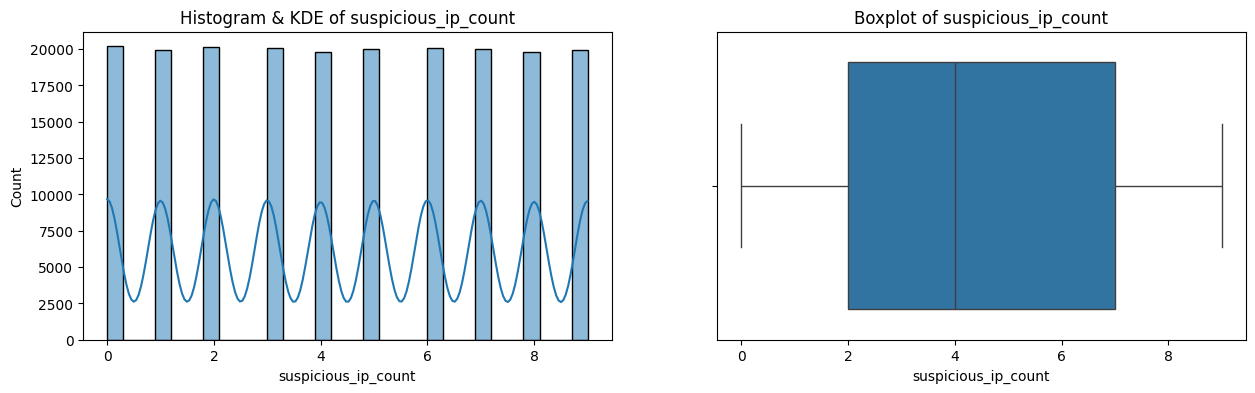

suspicious_ip_count
count        200000.000000
mean              4.489850
std               2.873703
min               0.000000
25%               2.000000
50%               4.000000
75%               7.000000
max               9.000000

In [123]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.histplot(data2['suspicious_ip_count'], kde=True, bins=30)
plt.title("Histogram & KDE of suspicious_ip_count")

plt.subplot(1,2,2)
sns.boxplot(x=data2['suspicious_ip_count'])
plt.title("Boxplot of suspicious_ip_count")

plt.show()

# Tabel ringkasan vertikal
display(data2['suspicious_ip_count'].describe().to_frame(name="suspicious_ip_count"))


####1.2.1.b malicious_payload_indicato

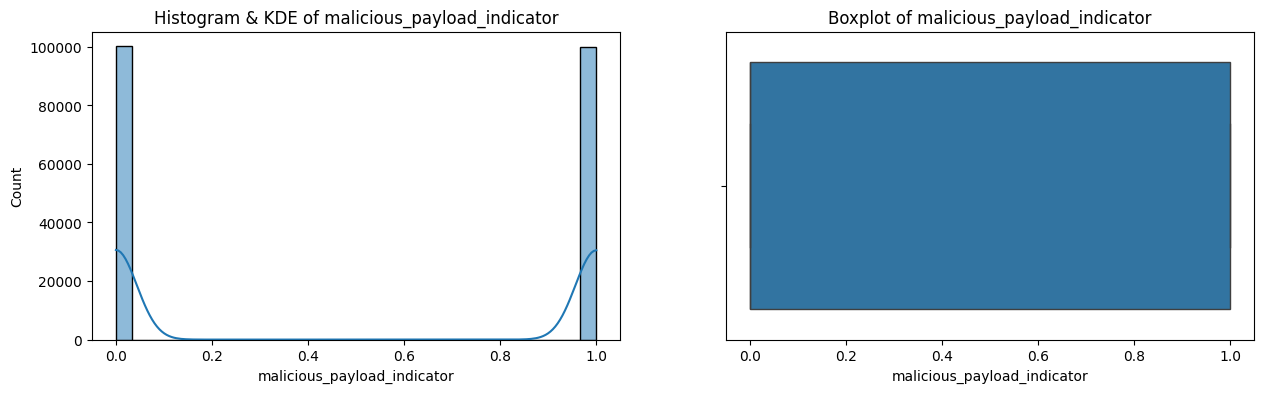

malicious_payload_indicator
count                 200000.00000
mean                       0.49912
std                        0.50000
min                        0.00000
25%                        0.00000
50%                        0.00000
75%                        1.00000
max                        1.00000

In [124]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.histplot(data2['malicious_payload_indicator'], kde=True, bins=30)
plt.title("Histogram & KDE of malicious_payload_indicator")

plt.subplot(1,2,2)
sns.boxplot(x=data2['malicious_payload_indicator'])
plt.title("Boxplot of malicious_payload_indicator")

plt.show()

display(data2['malicious_payload_indicator'].describe().to_frame(name="malicious_payload_indicator"))


####1.2.1.c reputation_score

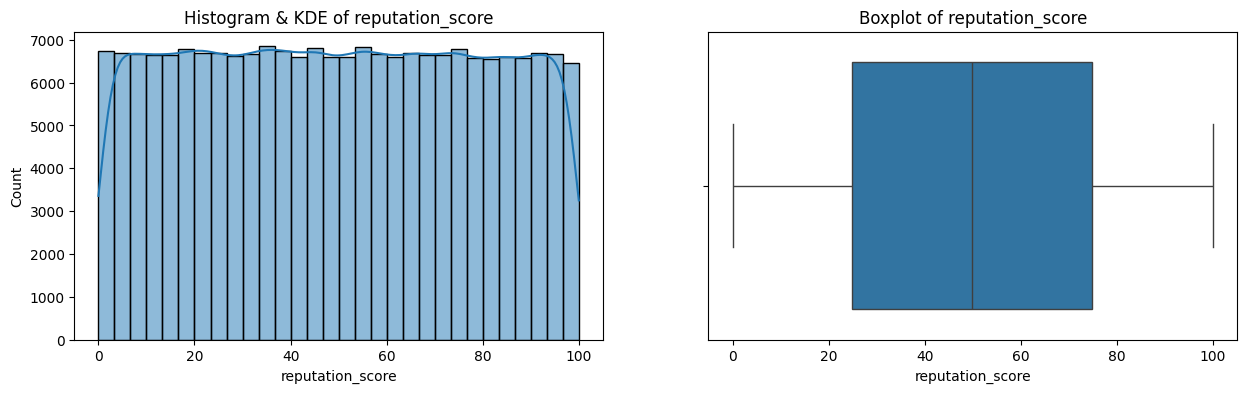

reputation_score
count     200000.000000
mean          49.849355
std           28.827126
min            0.000284
25%           24.860720
50%           49.771808
75%           74.741770
max           99.999639

In [125]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.histplot(data2['reputation_score'], kde=True, bins=30)
plt.title("Histogram & KDE of reputation_score")

plt.subplot(1,2,2)
sns.boxplot(x=data2['reputation_score'])
plt.title("Boxplot of reputation_score")

plt.show()

display(data2['reputation_score'].describe().to_frame(name="reputation_score"))


####1.2.1.d behavioral_score

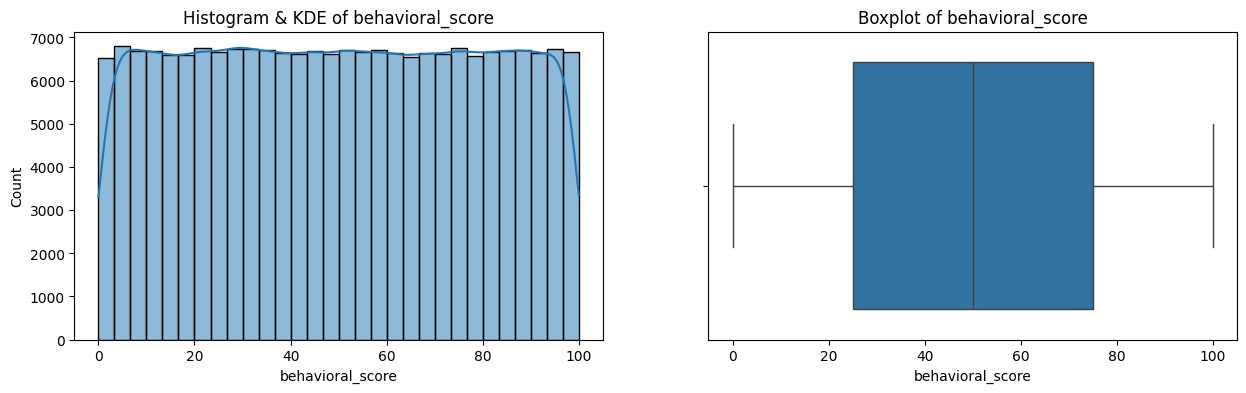

behavioral_score
count     200000.000000
mean          49.998517
std           28.876260
min            0.000287
25%           25.058753
50%           49.989385
75%           75.054458
max           99.999504

In [126]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.histplot(data2['behavioral_score'], kde=True, bins=30)
plt.title("Histogram & KDE of behavioral_score")

plt.subplot(1,2,2)
sns.boxplot(x=data2['behavioral_score'])
plt.title("Boxplot of behavioral_score")

plt.show()

display(data2['behavioral_score'].describe().to_frame(name="behavioral_score"))


####1.2.1.f Signature match

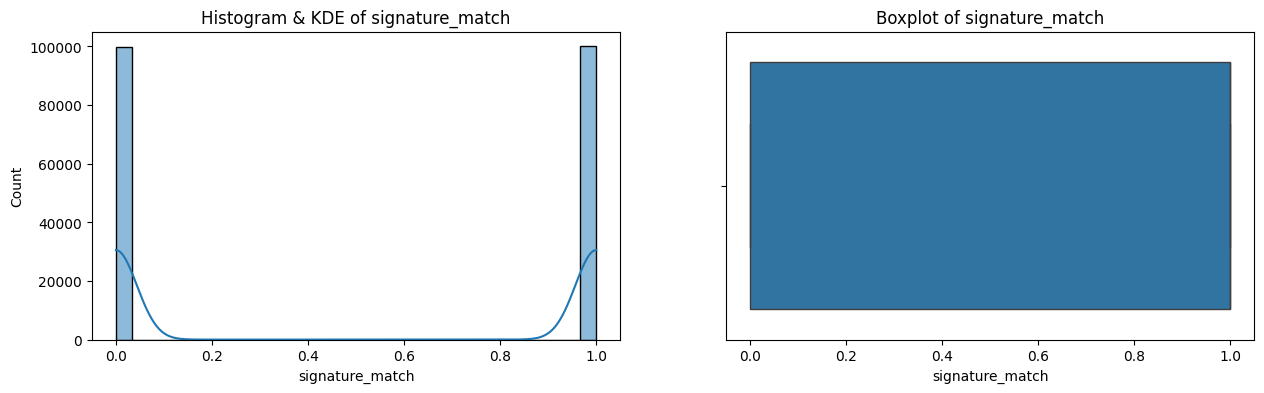

signature_match
count    200000.000000
mean          0.500295
std           0.500001
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000

In [127]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.histplot(data2['signature_match'], kde=True, bins=30)
plt.title("Histogram & KDE of signature_match")

plt.subplot(1,2,2)
sns.boxplot(x=data2['signature_match'])
plt.title("Boxplot of signature_match")

plt.show()

display(data2['signature_match'].describe().to_frame(name="signature_match"))


####1.2.1.g heuristic_score


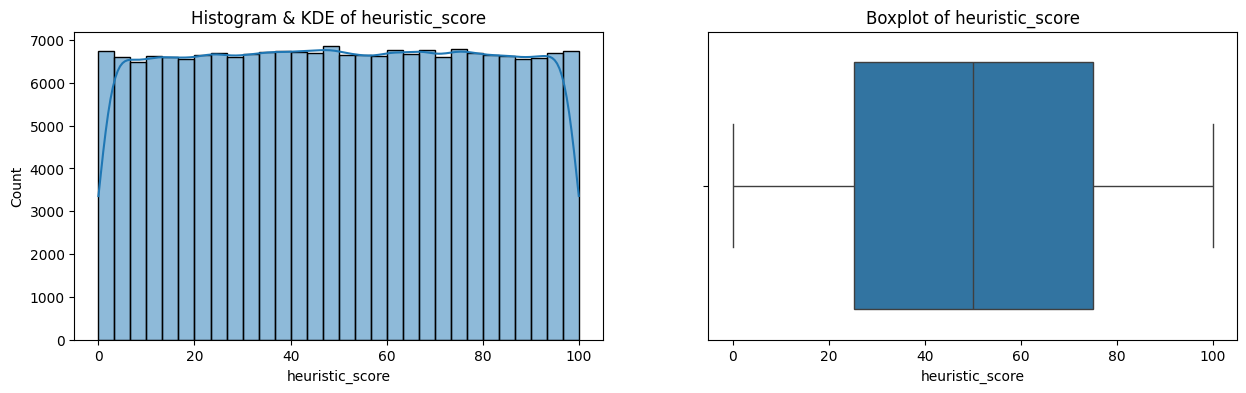

heuristic_score
count    200000.000000
mean         50.074518
std          28.816467
min           0.000678
25%          25.195372
50%          50.042406
75%          74.966178
max          99.999190

In [128]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.histplot(data2['heuristic_score'], kde=True, bins=30)
plt.title("Histogram & KDE of heuristic_score")

plt.subplot(1,2,2)
sns.boxplot(x=data2['heuristic_score'])
plt.title("Boxplot of heuristic_score")

plt.show()

display(data2['heuristic_score'].describe().to_frame(name="heuristic_score"))


###1.2.2 Variabel Kategorikal

####1.2.2.a attack_type

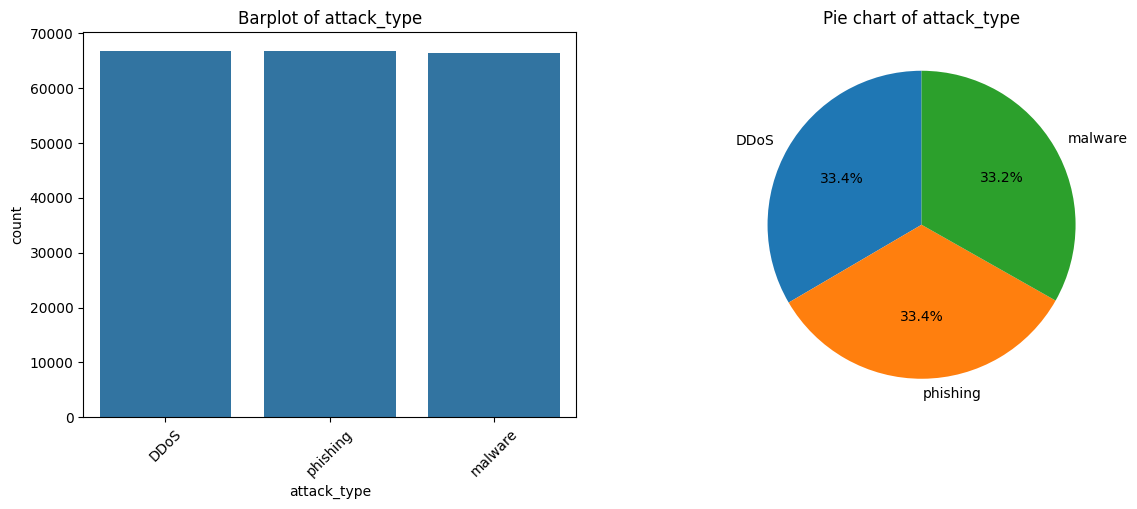

jumlah  count
0      DDoS  66864
1  phishing  66751
2   malware  66385

In [129]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.countplot(x=data2['attack_type'], order=data2['attack_type'].value_counts().index)
plt.title("Barplot of attack_type")
plt.xticks(rotation=45)

plt.subplot(1,2,2)
data2['attack_type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Pie chart of attack_type")
plt.ylabel("")
plt.show()

# Tabel ringkasan vertikal
display(data2['attack_type'].value_counts().reset_index().rename(columns={'index':'kategori','attack_type':'jumlah'}))


####1.2.2.b sandbox_result

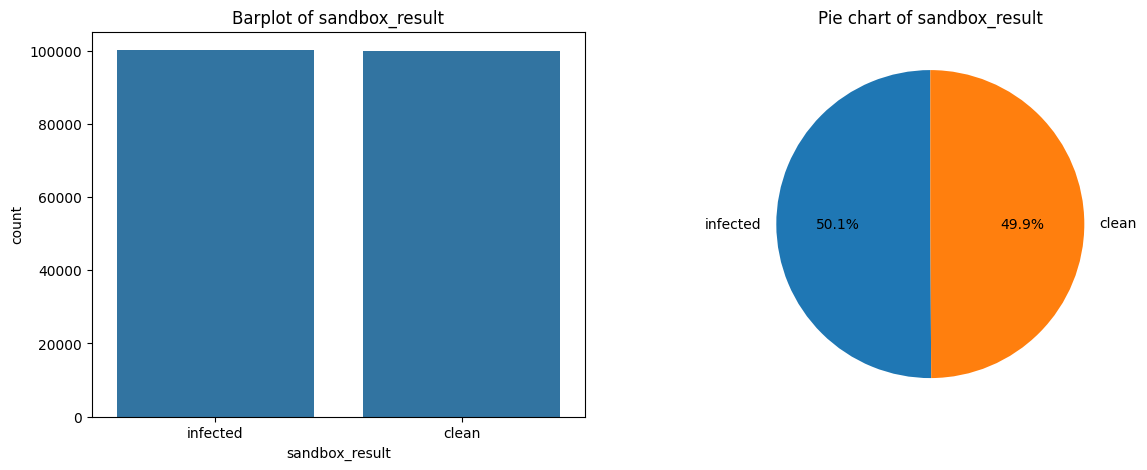

jumlah   count
0  infected  100185
1     clean   99815

In [130]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.countplot(x=data2['sandbox_result'], order=data2['sandbox_result'].value_counts().index)
plt.title("Barplot of sandbox_result")

plt.subplot(1,2,2)
data2['sandbox_result'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Pie chart of sandbox_result")
plt.ylabel("")
plt.show()

display(data2['sandbox_result'].value_counts().reset_index().rename(columns={'index':'kategori','sandbox_result':'jumlah'}))


####1.2.2.c traffic_pattern

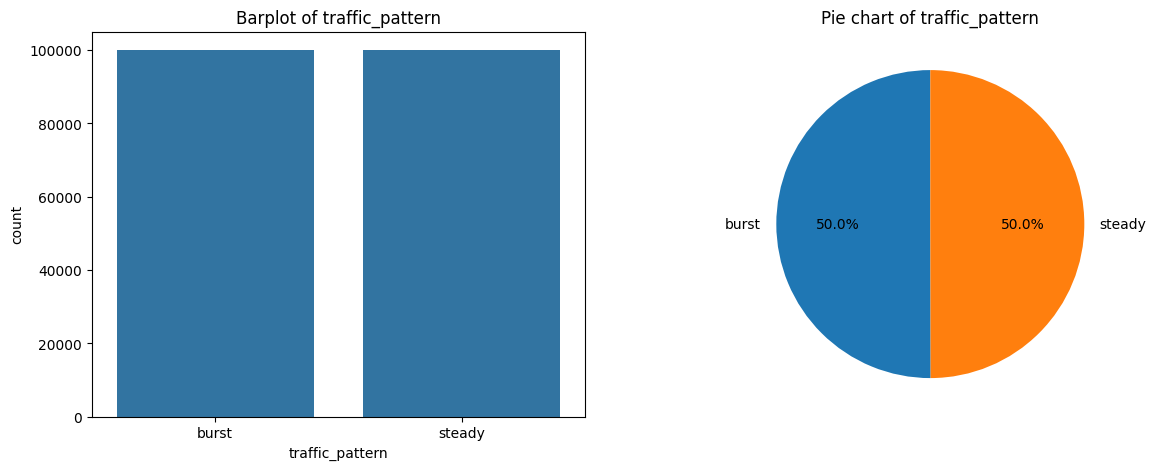

jumlah   count
0   burst  100065
1  steady   99935

In [131]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.countplot(x=data2['traffic_pattern'], order=data2['traffic_pattern'].value_counts().index)
plt.title("Barplot of traffic_pattern")

plt.subplot(1,2,2)
data2['traffic_pattern'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Pie chart of traffic_pattern")
plt.ylabel("")
plt.show()

display(data2['traffic_pattern'].value_counts().reset_index().rename(columns={'index':'kategori','traffic_pattern':'jumlah'}))


In [132]:
# get the shape of the dataset
baris, kolom = data2.shape
print("baris:", baris)
print("kolom:", kolom)

baris: 200000
kolom: 10


In [133]:
# get info of the dataset
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   anomaly_score                200000 non-null  float64
 1   suspicious_ip_count          200000 non-null  int64  
 2   malicious_payload_indicator  200000 non-null  int64  
 3   reputation_score             200000 non-null  float64
 4   behavioral_score             200000 non-null  float64
 5   attack_type                  200000 non-null  object 
 6   signature_match              200000 non-null  int64  
 7   sandbox_result               200000 non-null  object 
 8   heuristic_score              200000 non-null  float64
 9   traffic_pattern              200000 non-null  object 
dtypes: float64(4), int64(3), object(3)
memory usage: 15.3+ MB


In [134]:
# get statistical summary
data2.describe()

anomaly_score  suspicious_ip_count  malicious_payload_indicator  \
count  200000.000000        200000.000000                 200000.00000   
mean        0.500966             4.489850                      0.49912   
std         0.288896             2.873703                      0.50000   
min         0.000002             0.000000                      0.00000   
25%         0.251379             2.000000                      0.00000   
50%         0.500837             4.000000                      0.00000   
75%         0.751856             7.000000                      1.00000   
max         0.999994             9.000000                      1.00000   

       reputation_score  behavioral_score  signature_match  heuristic_score  
count     200000.000000     200000.000000    200000.000000    200000.000000  
mean          49.849355         49.998517         0.500295        50.074518  
std           28.827126         28.876260         0.500001        28.816467  
min            0.000284          0.000287         0.000000         0.000678  
25%           24.860720         25.058753         0.000000        25.195372  
50%           49.771808         49.989385         1.000000        50.042406  
75%           74.741770         75.054458         1.000000        74.966178  
max           99.999639         99.999504         1.000000        99.999190

# 2. Analisis Missing Values & Outlier
  - Persentase data yang hilang per kolom  
  - Visualisasi missing values (heatmap, bar chart)  
  - Penanganan missing values (drop, imputasi, dsb.)  
  - Identifikasi outlier (boxplot, Z-score, IQR)  
  - Strategi penanganan outlier

PRESENTASE DATA YANG HILANG PER-KOLOM

In [135]:
# =====================================
# KODE TAMBAHAN: MENCARI DATA YANG HILANG PER KOLOM
# =====================================

# MENCARI DATA YANG HILANG PER KOLOM
print("=== MISSING VALUES PER KOLOM UNTUK DATA1 (network_traffic_data.csv) ===")
missing_data1 = data1.isnull().sum()
print(missing_data1)
print(f"\nTotal missing values di data1: {missing_data1.sum()}")
print(f"Persentase missing values per kolom:\n{(missing_data1 / len(data1) * 100).round(2)}")

print("\n=== MISSING VALUES PER KOLOM UNTUK DATA2 (malware_detection_data.csv) ===")
missing_data2 = data2.isnull().sum()
print(missing_data2)
print(f"\nTotal missing values di data2: {missing_data2.sum()}")
print(f"Persentase missing values per kolom:\n{(missing_data2 / len(data2) * 100).round(2)}")

# VISUALISASI SEBAGAI TABEL BERWARNA (menggunakan pandas styling untuk HTML di Colab)
# Buat DataFrame untuk tabel data1
missing_df1 = pd.DataFrame({
    'Kolom': missing_data1.index,
    'Jumlah Missing': missing_data1.values,
    'Persentase (%)': (missing_data1 / len(data1) * 100).round(2).values
})

# Buat DataFrame untuk tabel data2
missing_df2 = pd.DataFrame({
    'Kolom': missing_data2.index,
    'Jumlah Missing': missing_data2.values,
    'Persentase (%)': (missing_data2 / len(data2) * 100).round(2).values
})

# Fungsi untuk styling tabel dengan warna
def style_missing_table(df):
    # Gradasi warna pada kolom 'Persentase (%)' (merah untuk tinggi, hijau untuk rendah)
    styled = df.style.background_gradient(subset=['Persentase (%)'], cmap='RdYlGn_r', low=0, high=1)

    # Highlight baris dengan persentase > 5% (background merah muda)
    def highlight_high_missing(val):
        if isinstance(val, (int, float)) and val > 5:
            return 'background-color: #ffcccc'  # Merah muda untuk persentase tinggi
        return ''

    # Highlight baris dengan jumlah missing > 0 (background kuning muda)
    def highlight_any_missing(val):
        if isinstance(val, int) and val > 0:
            return 'background-color: #fff2cc'  # Kuning muda untuk ada missing
        return ''

    # Terapkan conditional formatting
    styled = styled.applymap(highlight_high_missing, subset=['Persentase (%)'])
    styled = styled.applymap(highlight_any_missing, subset=['Jumlah Missing'])

    # Format angka
    styled = styled.format({
        'Jumlah Missing': '{:,.0f}',
        'Persentase (%)': '{:.2f}%'
    })

    # Tambahkan border dan font untuk keterbacaan
    styled = styled.set_table_styles([
        {'selector': 'th', 'props': [('font-weight', 'bold'), ('text-align', 'center'), ('background-color', '#f0f0f0')]},
        {'selector': 'td', 'props': [('text-align', 'center'), ('padding', '8px')]}
    ])

    return styled

# Tampilkan tabel berwarna untuk data1
print("\n=== TABEL VISUALISASI MISSING VALUES UNTUK DATA1 (network_traffic_data.csv) ===")
display(missing_df1.pipe(style_missing_table))

# Tampilkan tabel berwarna untuk data2
print("\n=== TABEL VISUALISASI MISSING VALUES UNTUK DATA2 (malware_detection_data.csv) ===")
display(missing_df2.pipe(style_missing_table))

# Ringkasan total (opsional, tetap teks)
print(f"\nTotal missing values di data1: {missing_data1.sum()}")
print(f"Total missing values di data2: {missing_data2.sum()}")

=== MISSING VALUES PER KOLOM UNTUK DATA1 (network_traffic_data.csv) ===
timestamp               0
source_ip               0
destination_ip          0
source_port             0
destination_port        0
protocol                0
packet_length           0
payload_data            0
flag                    0
traffic_volume          0
flow_duration           0
flow_bytes_per_s        0
flow_packets_per_s      0
packet_count            0
average_packet_size     0
min_packet_size         0
max_packet_size         0
packet_size_variance    0
header_length           0
payload_length          0
ip_ttl                  0
tcp_window_size         0
icmp_type               0
dns_query_count         0
dns_response_count      0
http_method             0
http_status_code        0
content_type            0
ssl_tls_version         0
ssl_tls_cipher_suite    0
year                    0
month                   0
day                     0
hour                    0
dtype: int64

Total missing values di data1:

/tmp/ipython-input-2329948180.py:51: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled = styled.applymap(highlight_high_missing, subset=['Persentase (%)'])
/tmp/ipython-input-2329948180.py:52: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled = styled.applymap(highlight_any_missing, subset=['Jumlah Missing'])



=== TABEL VISUALISASI MISSING VALUES UNTUK DATA2 (malware_detection_data.csv) ===


/tmp/ipython-input-2329948180.py:51: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled = styled.applymap(highlight_high_missing, subset=['Persentase (%)'])
/tmp/ipython-input-2329948180.py:52: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled = styled.applymap(highlight_any_missing, subset=['Jumlah Missing'])



Total missing values di data1: 0
Total missing values di data2: 0


In [136]:
print("Menampilkan 5 baris pertama dari data1:")
display(data1.head())

print("\nMenampilkan 5 baris pertama dari data2:")
display(data2.head())

Menampilkan 5 baris pertama dari data1:


timestamp        source_ip  destination_ip  source_port  \
0 2024-06-28 19:02:55   86.230.134.129      3.46.98.34         3756   
1 2022-12-09 13:36:47   37.211.177.132   40.109.190.27        44591   
2 2022-08-22 04:59:38     54.129.79.47   77.250.43.217        43637   
3 2023-02-07 15:30:41    157.59.116.46  211.120.32.204        53440   
4 2020-12-08 21:06:49  161.125.154.101      62.15.8.89        46915   

   destination_port protocol  packet_length          payload_data flag  \
0             35357     ICMP            497   Theory hear parent.  ACK   
1             30823     ICMP            103  Trade indicate fill.  SYN   
2             60156      TCP            169        Political put.  FIN   
3             17944      UDP             51    Already really of.  SYN   
4              3390     ICMP            349     Least under sort.  ACK   

   traffic_volume  ...  dns_response_count  http_method  http_status_code  \
0       95.706008  ...                   3          GET               200   
1      209.420013  ...                   0          GET               500   
2       68.588853  ...                   3          PUT               301   
3      218.471503  ...                   4          PUT               500   
4      712.184191  ...                   8       DELETE               200   

       content_type  ssl_tls_version                   ssl_tls_cipher_suite  \
0  application/json          TLS 1.2  TLS_ECDHE_RSA_WITH_AES_128_GCM_SHA256   
1  application/json          TLS 1.1           TLS_RSA_WITH_AES_128_CBC_SHA   
2  application/json          TLS 1.3  TLS_ECDHE_RSA_WITH_AES_128_GCM_SHA256   
3         text/html          TLS 1.3           TLS_RSA_WITH_AES_128_CBC_SHA   
4         text/html          TLS 1.0  TLS_ECDHE_RSA_WITH_AES_128_GCM_SHA256   

   year  month  day  hour  
0  2024      6   28    19  
1  2022     12    9    13  
2  2022      8   22     4  
3  2023      2    7    15  
4  2020     12    8    21  

[5 rows x 34 columns]


Menampilkan 5 baris pertama dari data2:


anomaly_score  suspicious_ip_count  malicious_payload_indicator  \
0       0.687331                    5                            1   
1       0.519249                    2                            1   
2       0.363944                    7                            0   
3       0.890735                    9                            0   
4       0.686994                    8                            0   

   reputation_score  behavioral_score attack_type  signature_match  \
0         82.673157         24.141808     malware                1   
1         27.140515         69.788583    phishing                1   
2         21.243343         53.630703    phishing                0   
3         76.188191         41.066927    phishing                1   
4         12.935845          6.254213        DDoS                0   

  sandbox_result  heuristic_score traffic_pattern  
0       infected         3.952639           burst  
1          clean        57.429668          steady  
2          clean        98.507689          steady  
3       infected        40.119337          steady  
4          clean        79.303526          steady

Identifikasi outlier (boxplot, Z-score, IQR)

=== KOLOM NUMERIK UNTUK ANALISIS OUTLIER ===
Data1: ['source_port', 'destination_port', 'packet_length', 'traffic_volume', 'flow_duration', 'flow_bytes_per_s', 'flow_packets_per_s', 'packet_count', 'average_packet_size', 'min_packet_size', 'max_packet_size', 'packet_size_variance', 'header_length', 'payload_length', 'ip_ttl', 'tcp_window_size', 'dns_query_count', 'dns_response_count', 'http_status_code', 'year', 'month', 'day', 'hour']
Data2: ['anomaly_score', 'suspicious_ip_count', 'malicious_payload_indicator', 'reputation_score', 'behavioral_score', 'signature_match', 'heuristic_score']

=== IDENTIFIKASI OUTLIER UNTUK DATA1 (network_traffic_data.csv) ===


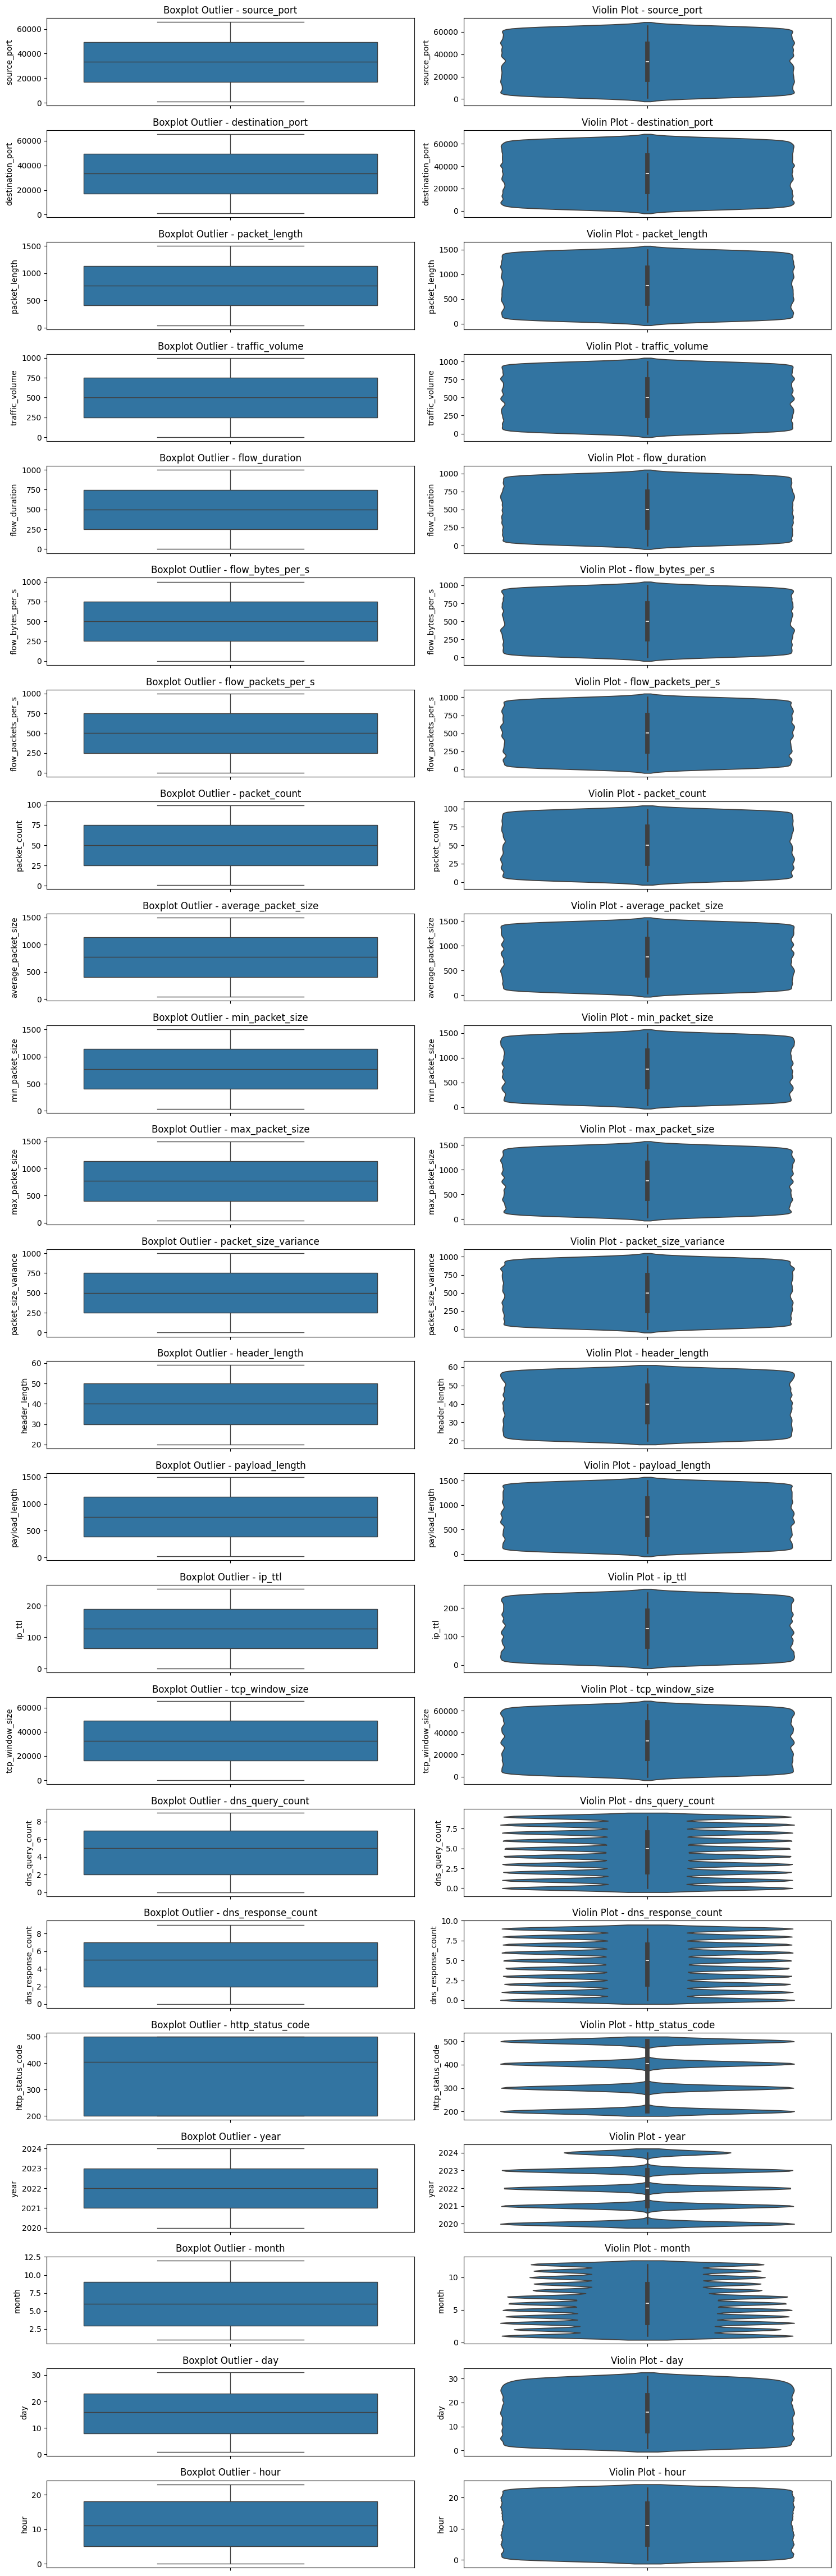


Kolom 'source_port':
  Z-score Outliers: 0 (indeks: []...)
  IQR Outliers: 0 (indeks: []...)

Kolom 'destination_port':
  Z-score Outliers: 0 (indeks: []...)
  IQR Outliers: 0 (indeks: []...)

Kolom 'packet_length':
  Z-score Outliers: 0 (indeks: []...)
  IQR Outliers: 0 (indeks: []...)

Kolom 'traffic_volume':
  Z-score Outliers: 0 (indeks: []...)
  IQR Outliers: 0 (indeks: []...)

Kolom 'flow_duration':
  Z-score Outliers: 0 (indeks: []...)
  IQR Outliers: 0 (indeks: []...)

Kolom 'flow_bytes_per_s':
  Z-score Outliers: 0 (indeks: []...)
  IQR Outliers: 0 (indeks: []...)

Kolom 'flow_packets_per_s':
  Z-score Outliers: 0 (indeks: []...)
  IQR Outliers: 0 (indeks: []...)

Kolom 'packet_count':
  Z-score Outliers: 0 (indeks: []...)
  IQR Outliers: 0 (indeks: []...)

Kolom 'average_packet_size':
  Z-score Outliers: 0 (indeks: []...)
  IQR Outliers: 0 (indeks: []...)

Kolom 'min_packet_size':
  Z-score Outliers: 0 (indeks: []...)
  IQR Outliers: 0 (indeks: []...)

Kolom 'max_packet_size

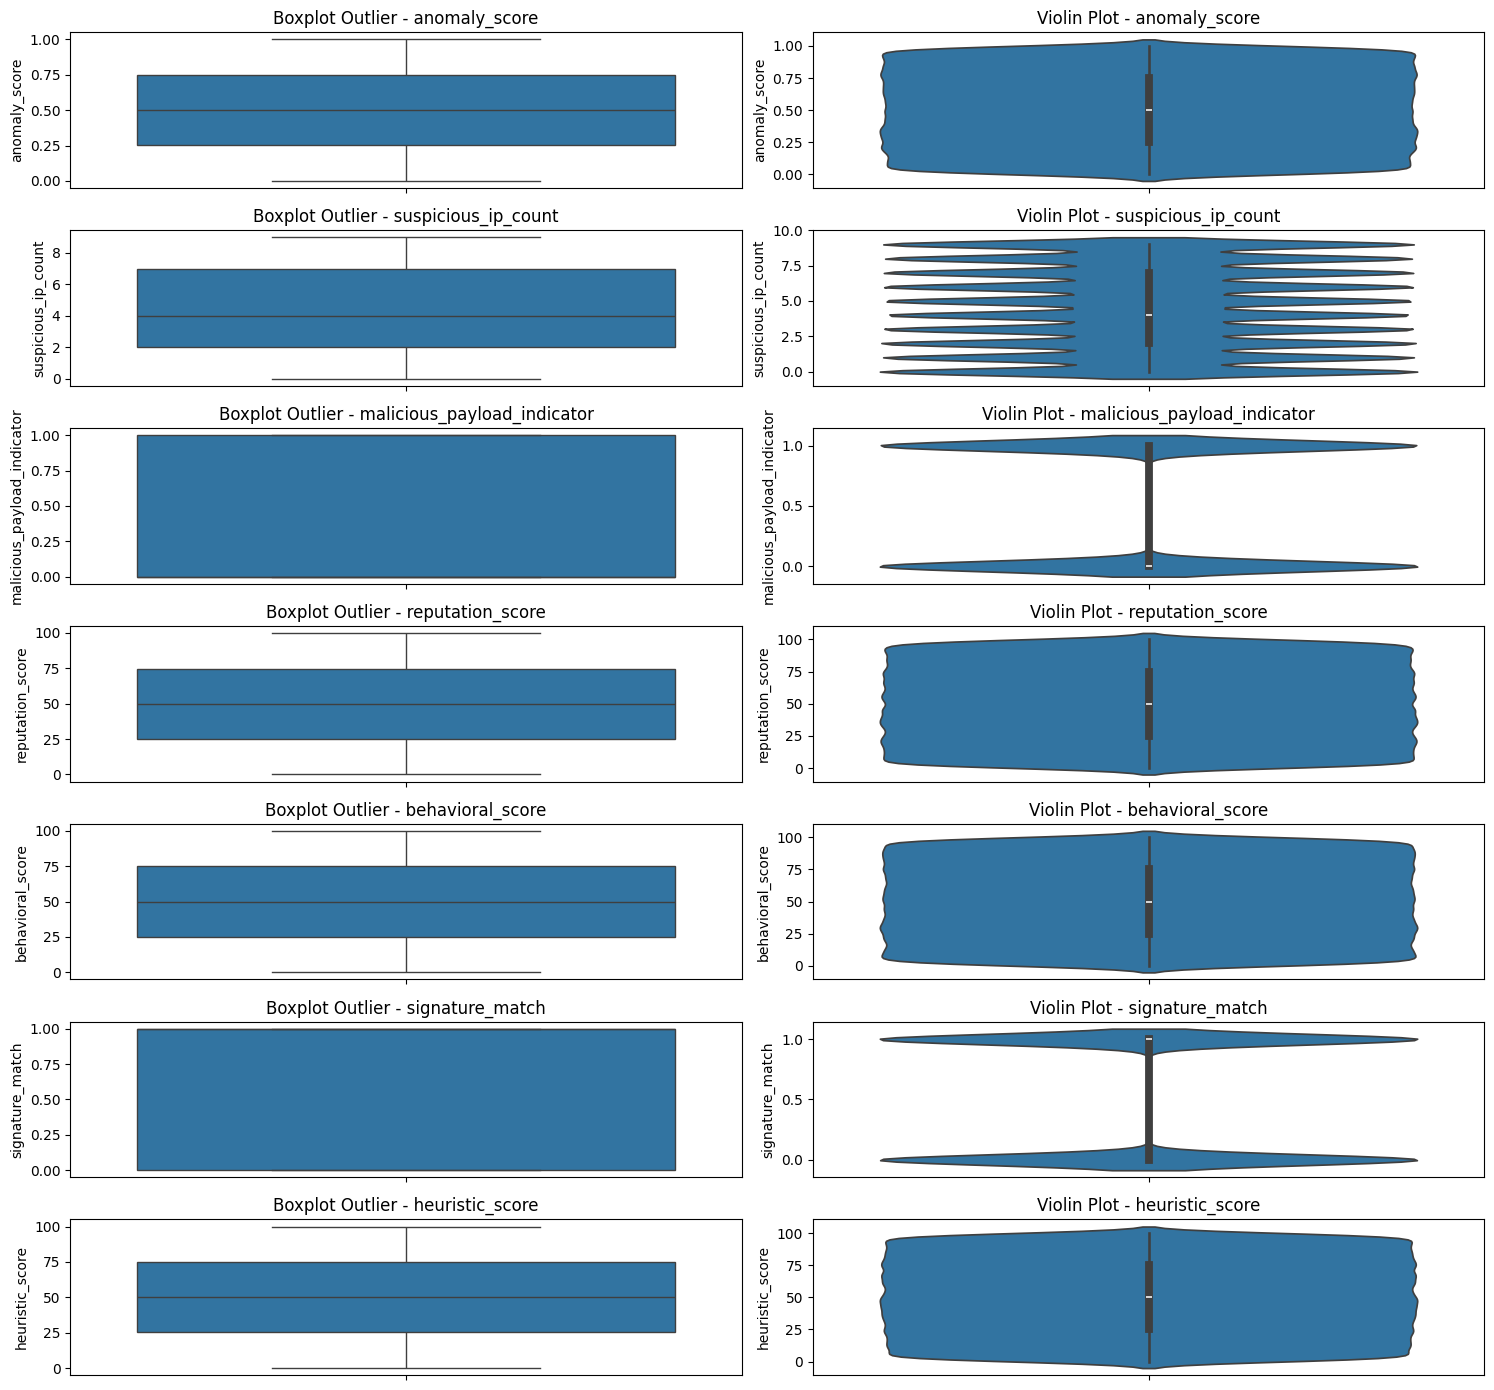


Kolom 'anomaly_score':
  Z-score Outliers: 0 (indeks: []...)
  IQR Outliers: 0 (indeks: []...)

Kolom 'suspicious_ip_count':
  Z-score Outliers: 0 (indeks: []...)
  IQR Outliers: 0 (indeks: []...)

Kolom 'malicious_payload_indicator':
  Z-score Outliers: 0 (indeks: []...)
  IQR Outliers: 0 (indeks: []...)

Kolom 'reputation_score':
  Z-score Outliers: 0 (indeks: []...)
  IQR Outliers: 0 (indeks: []...)

Kolom 'behavioral_score':
  Z-score Outliers: 0 (indeks: []...)
  IQR Outliers: 0 (indeks: []...)

Kolom 'signature_match':
  Z-score Outliers: 0 (indeks: []...)
  IQR Outliers: 0 (indeks: []...)

Kolom 'heuristic_score':
  Z-score Outliers: 0 (indeks: []...)
  IQR Outliers: 0 (indeks: []...)

Total Outlier Z-score di Data2: 0
Total Outlier IQR di Data2: 0


In [137]:
# Fungsi untuk mendeteksi outlier menggunakan Z-score (threshold = 3)
def detect_outliers_zscore(df, col, threshold=3):
    z_scores = np.abs(stats.zscore(df[col].dropna()))
    outliers = df[col][z_scores > threshold]
    return len(outliers), outliers.index.tolist()

# Fungsi untuk mendeteksi outlier menggunakan IQR
def detect_outliers_iqr(df, col, multiplier=1.5):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    return len(outliers), outliers.index.tolist()

# Identifikasi kolom numerik (exclude non-numeric seperti 'label' jika ada)
numeric_cols_data1 = data1.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols_data2 = data2.select_dtypes(include=[np.number]).columns.tolist()
print("=== KOLOM NUMERIK UNTUK ANALISIS OUTLIER ===")
print("Data1:", numeric_cols_data1)
print("Data2:", numeric_cols_data2)

# ANALISIS DATA 1

print("\n=== IDENTIFIKASI OUTLIER UNTUK DATA1 (network_traffic_data.csv) ===")
# 1. BOXPLOT DAN VIOLIN PLOT UNTUK VISUALISASI OUTLIER (Data1)
plt.figure(figsize=(15, len(numeric_cols_data1) * 2)) # Adjust figure height based on number of columns
for i, col in enumerate(numeric_cols_data1, 1):
    plt.subplot(len(numeric_cols_data1), 2, (i*2)-1)
    sns.boxplot(y=data1[col].dropna())
    plt.title(f'Boxplot Outlier - {col}')
    plt.subplot(len(numeric_cols_data1), 2, i*2)
    sns.violinplot(y=data1[col].dropna())
    plt.title(f'Violin Plot - {col}')
plt.tight_layout()
plt.show()


# 2. Z-SCORE DAN IQR UNTUK DATA1
outliers_zscore_data1 = {}
outliers_iqr_data1 = {}
for col in numeric_cols_data1:
    if data1[col].dropna().std() > 0:  # Hindari kolom dengan std=0
        num_z, idx_z = detect_outliers_zscore(data1, col)
        num_iqr, idx_iqr = detect_outliers_iqr(data1, col)
        outliers_zscore_data1[col] = {'jumlah': num_z, 'indeks': idx_z}
        outliers_iqr_data1[col] = {'jumlah': num_iqr, 'indeks': idx_iqr}
        print(f"\nKolom '{col}':")
        print(f"  Z-score Outliers: {num_z} (indeks: {idx_z[:5]}...)")  # Tampilkan 5 indeks pertama
        print(f"  IQR Outliers: {num_iqr} (indeks: {idx_iqr[:5]}...)")

# Ringkasan total outlier
total_z_data1 = sum(d['jumlah'] for d in outliers_zscore_data1.values())
total_iqr_data1 = sum(d['jumlah'] for d in outliers_iqr_data1.values())
print(f"\nTotal Outlier Z-score di Data1: {total_z_data1}")
print(f"Total Outlier IQR di Data1: {total_iqr_data1}")

# ANALISIS UNTUK DATA 2
print("\n=== IDENTIFIKASI OUTLIER UNTUK DATA2 (malware_detection_data.csv) ===")

# 1. BOXPLOT DAN VIOLIN PLOT UNTUK VISUALISASI OUTLIER (Data2)
plt.figure(figsize=(15, len(numeric_cols_data2) * 2)) # Adjust figure height based on number of columns
for i, col in enumerate(numeric_cols_data2, 1):
    plt.subplot(len(numeric_cols_data2), 2, (i*2)-1)
    sns.boxplot(y=data2[col].dropna())
    plt.title(f'Boxplot Outlier - {col}')
    plt.subplot(len(numeric_cols_data2), 2, i*2)
    sns.violinplot(y=data2[col].dropna())
    plt.title(f'Violin Plot - {col}')
plt.tight_layout()
plt.show()

# 2. Z-SCORE DAN IQR UNTUK DATA2
outliers_zscore_data2 = {}
outliers_iqr_data2 = {}
for col in numeric_cols_data2:
    if data2[col].dropna().std() > 0:  # Hindari kolom dengan std=0
        num_z, idx_z = detect_outliers_zscore(data2, col)
        num_iqr, idx_iqr = detect_outliers_iqr(data2, col)
        outliers_zscore_data2[col] = {'jumlah': num_z, 'indeks': idx_z}
        outliers_iqr_data2[col] = {'jumlah': num_iqr, 'indeks': idx_iqr}
        print(f"\nKolom '{col}':")
        print(f"  Z-score Outliers: {num_z} (indeks: {idx_z[:5]}...)")  # Tampilkan 5 indeks pertama
        print(f"  IQR Outliers: {num_iqr} (indeks: {idx_iqr[:5]}...)")

# Ringkasan total outlier
total_z_data2 = sum(d['jumlah'] for d in outliers_zscore_data2.values())
total_iqr_data2 = sum(d['jumlah'] for d in outliers_iqr_data2.values())
print(f"\nTotal Outlier Z-score di Data2: {total_z_data2}")
print(f"Total Outlier IQR di Data2: {total_iqr_data2}")

Strategi penanganan outlier


=== PENERAPAN STRATEGI PENANGANAN OUTLIER UNTUK DATA1 ===

--- 1. HAPUS OUTLIER (Deletion) ---
  Setelah hapus outlier di 'source_port': Shape = (200000, 34)
  Setelah hapus outlier di 'destination_port': Shape = (200000, 34)
  Setelah hapus outlier di 'packet_length': Shape = (200000, 34)
  Setelah hapus outlier di 'traffic_volume': Shape = (200000, 34)
  Setelah hapus outlier di 'flow_duration': Shape = (200000, 34)
  Setelah hapus outlier di 'flow_bytes_per_s': Shape = (200000, 34)
  Setelah hapus outlier di 'flow_packets_per_s': Shape = (200000, 34)
  Setelah hapus outlier di 'packet_count': Shape = (200000, 34)
  Setelah hapus outlier di 'average_packet_size': Shape = (200000, 34)
  Setelah hapus outlier di 'min_packet_size': Shape = (200000, 34)
  Setelah hapus outlier di 'max_packet_size': Shape = (200000, 34)
  Setelah hapus outlier di 'packet_size_variance': Shape = (200000, 34)
  Setelah hapus outlier di 'header_length': Shape = (200000, 34)
  Setelah hapus outlier di 'paylo

/tmp/ipython-input-4132717762.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-31379.875' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_cap.loc[df_cap[col] < lower, col] = lower
/tmp/ipython-input-4132717762.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-31337.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_cap.loc[df_cap[col] < lower, col] = lower
/tmp/ipython-input-4132717762.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-126.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_cap.loc[df_cap[col] < lower, col] = lower
/tmp/ipython-input-4132717762.py:33: FutureWarning: Setting an item of

  Shape setelah capping: (200000, 34) (tidak ada baris terhapus)

--- 3. ISI OUTLIER DENGAN MEDIAN ---
  Shape setelah mengisi outlier dengan median: (200000, 34) (tidak ada baris terhapus)

--- Verifikasi Visual (Boxplot Setelah Capping - Data1) ---


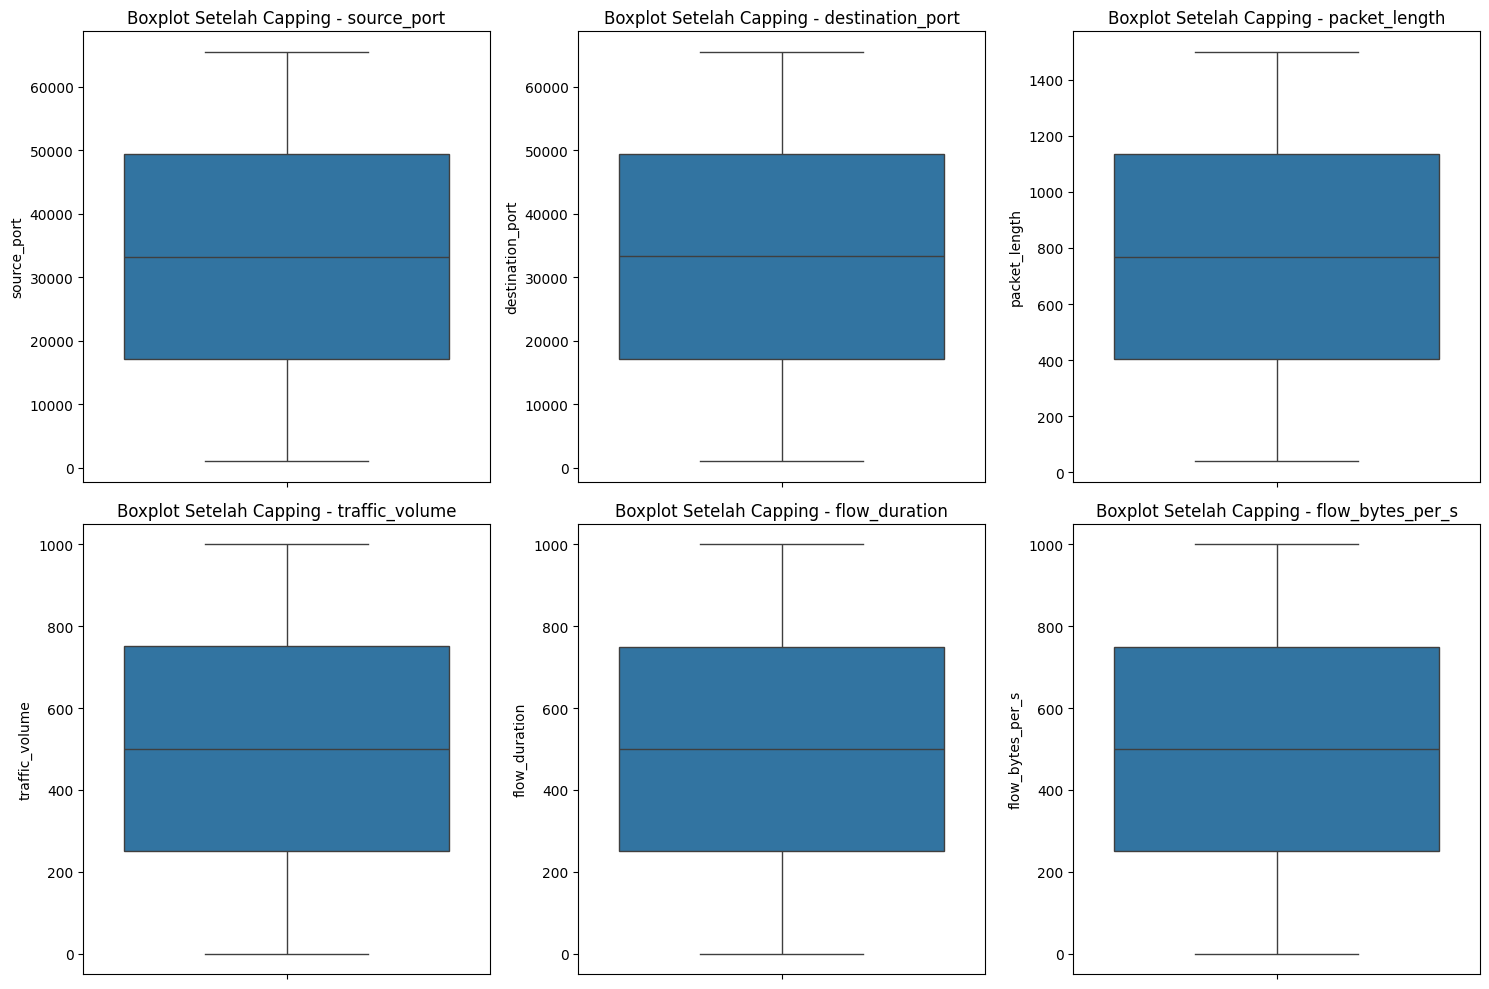


=== PENERAPAN STRATEGI PENANGANAN OUTLIER UNTUK DATA2 ===

--- 1. HAPUS OUTLIER (Deletion) ---
  Setelah hapus outlier di 'anomaly_score': Shape = (200000, 10)
  Setelah hapus outlier di 'suspicious_ip_count': Shape = (200000, 10)
  Setelah hapus outlier di 'malicious_payload_indicator': Shape = (200000, 10)
  Setelah hapus outlier di 'reputation_score': Shape = (200000, 10)
  Setelah hapus outlier di 'behavioral_score': Shape = (200000, 10)
  Setelah hapus outlier di 'signature_match': Shape = (200000, 10)
  Setelah hapus outlier di 'heuristic_score': Shape = (200000, 10)
  Final shape setelah hapus semua outlier secara berurutan: (200000, 10)
  Total baris terhapus: 0 (0.00%)

--- 2. CAPPING OUTLIER (Winsorizing) ---
  Shape setelah capping: (200000, 10) (tidak ada baris terhapus)

--- 3. ISI OUTLIER DENGAN MEDIAN ---


/tmp/ipython-input-4132717762.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-5.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_cap.loc[df_cap[col] < lower, col] = lower
/tmp/ipython-input-4132717762.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_cap.loc[df_cap[col] < lower, col] = lower
/tmp/ipython-input-4132717762.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_cap.loc[df_cap[col] < lower, col] = lower


  Shape setelah mengisi outlier dengan median: (200000, 10) (tidak ada baris terhapus)

--- Verifikasi Visual (Boxplot Setelah Capping - Data2) ---


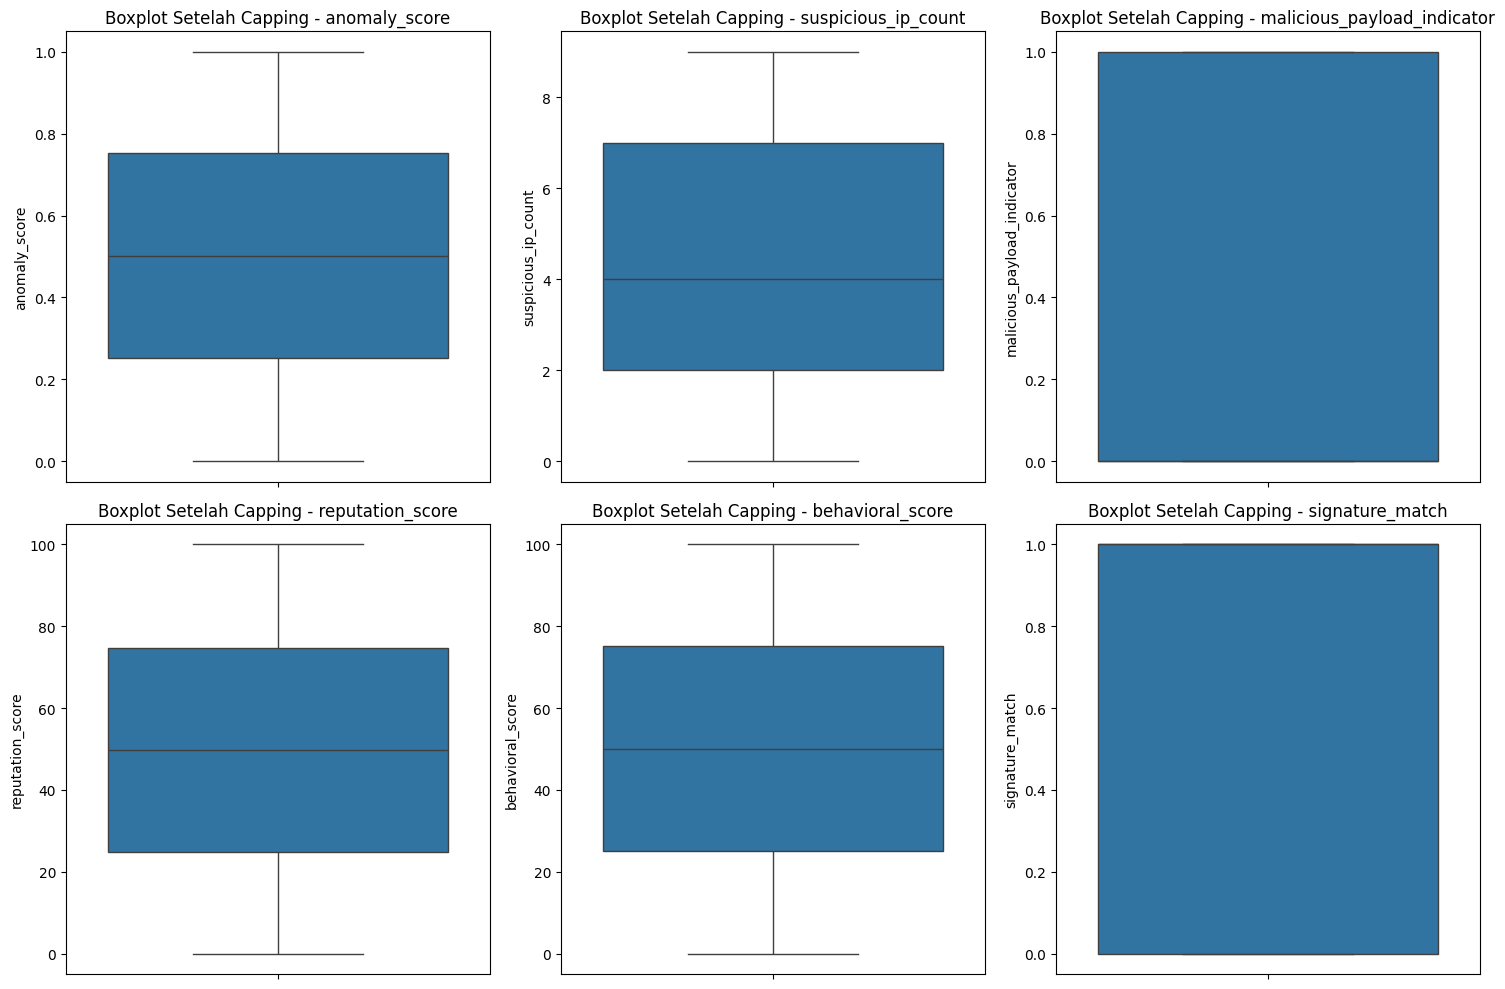


--- 4. TRANSFORMASI LOG (Opsional untuk Skewed Data) ---


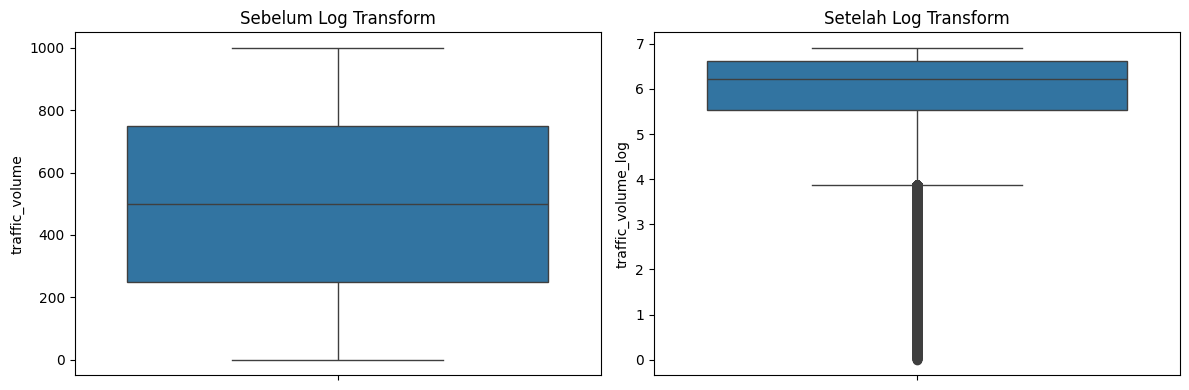


=== RINGKASAN STATISTIK SETELAH PENANGANAN (Capping) ===
Data1 setelah capping:


source_port  destination_port  packet_length  traffic_volume  \
count    200000.00         200000.00      200000.00       200000.00   
mean      33227.25          33293.50         769.62          500.11   
std       18627.85          18626.16         421.44          289.09   
min        1024.00           1024.00          40.00            0.00   
25%       17075.00          17126.00         405.00          249.78   
50%       33174.00          33344.00         769.00          500.17   
75%       49378.25          49435.00        1135.00          751.00   
max       65534.00          65534.00        1499.00         1000.00   

       flow_duration  flow_bytes_per_s  flow_packets_per_s  packet_count  \
count      200000.00         200000.00           200000.00     200000.00   
mean          500.04            500.08              500.66         50.03   
std           288.44            288.59              288.48         28.60   
min             0.00              0.02                0.00          1.00   
25%           250.31            250.57              251.18         25.00   
50%           499.95            499.96              501.76         50.00   
75%           748.88            750.17              750.24         75.00   
max          1000.00           1000.00             1000.00         99.00   

       average_packet_size  min_packet_size  ...  payload_length     ip_ttl  \
count            200000.00        200000.00  ...       200000.00  200000.00   
mean                770.89           772.03  ...          759.87     127.35   
std                 421.53           422.24  ...          427.06      73.41   
min                  40.01            40.01  ...           20.00       1.00   
25%                 405.90           406.46  ...          391.00      64.00   
50%                 771.53           772.17  ...          760.00     127.00   
75%                1136.39          1138.47  ...         1129.00     191.00   
max                1499.99          1499.99  ...         1499.00     254.00   

       tcp_window_size  dns_query_count  dns_response_count  http_status_code  \
count        200000.00        200000.00           200000.00         200000.00   
mean          32753.31             4.50                4.50            351.27   
std           18914.44             2.87                2.87            112.24   
min               1.00             0.00                0.00            200.00   
25%           16358.75             2.00                2.00            200.00   
50%           32715.00             5.00                5.00            404.00   
75%           49156.00             7.00                7.00            500.00   
max           65534.00             9.00                9.00            500.00   

            year      month        day       hour  
count  200000.00  200000.00  200000.00  200000.00  
mean     2021.81       6.20      15.70      11.50  
std         1.33       3.41       8.77       6.93  
min      2020.00       1.00       1.00       0.00  
25%      2021.00       3.00       8.00       5.00  
50%      2022.00       6.00      16.00      11.00  
75%      2023.00       9.00      23.00      18.00  
max      2024.00      12.00      31.00      23.00  

[8 rows x 23 columns]


Data2 setelah capping:


anomaly_score  suspicious_ip_count  malicious_payload_indicator  \
count      200000.00            200000.00                     200000.0   
mean            0.50                 4.49                          0.5   
std             0.29                 2.87                          0.5   
min             0.00                 0.00                          0.0   
25%             0.25                 2.00                          0.0   
50%             0.50                 4.00                          0.0   
75%             0.75                 7.00                          1.0   
max             1.00                 9.00                          1.0   

       reputation_score  behavioral_score  signature_match  heuristic_score  
count         200000.00         200000.00         200000.0        200000.00  
mean              49.85             50.00              0.5            50.07  
std               28.83             28.88              0.5            28.82  
min                0.00              0.00              0.0             0.00  
25%               24.86             25.06              0.0            25.20  
50%               49.77             49.99              1.0            50.04  
75%               74.74             75.05              1.0            74.97  
max              100.00            100.00              1.0           100.00


=== VISUALISASI EFEK PENANGANAN OUTLIER PADA DATA2 (VIOLIN PLOT) ===


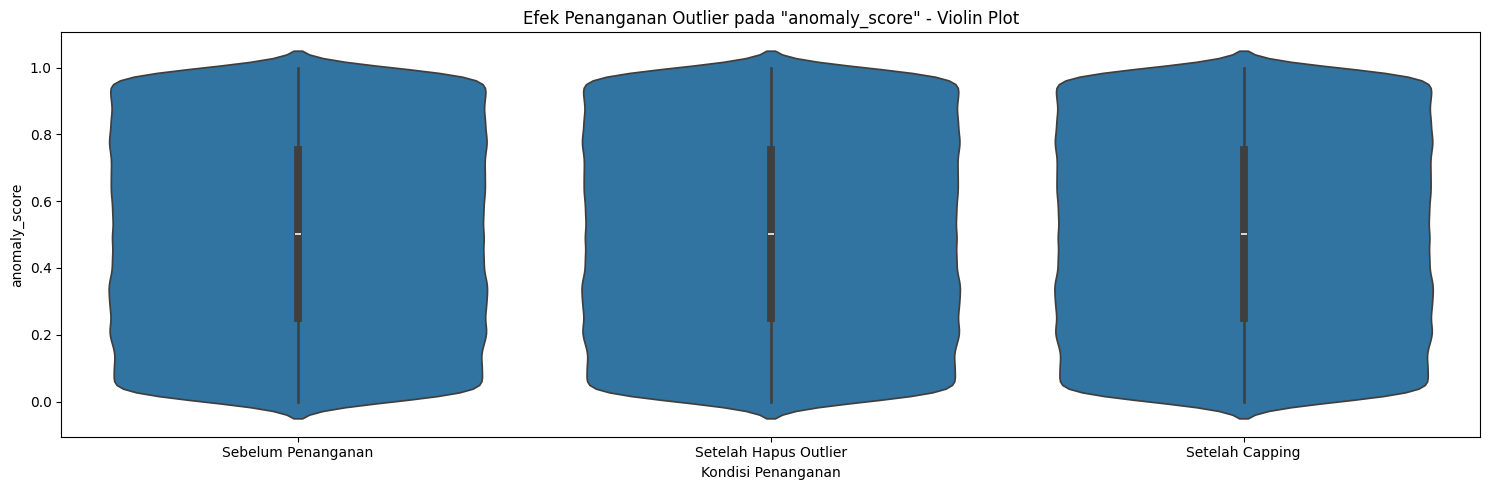

/tmp/ipython-input-4132717762.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-5.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_cap.loc[df_cap[col] < lower, col] = lower
/tmp/ipython-input-4132717762.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-5.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_cap.loc[df_cap[col] < lower, col] = lower


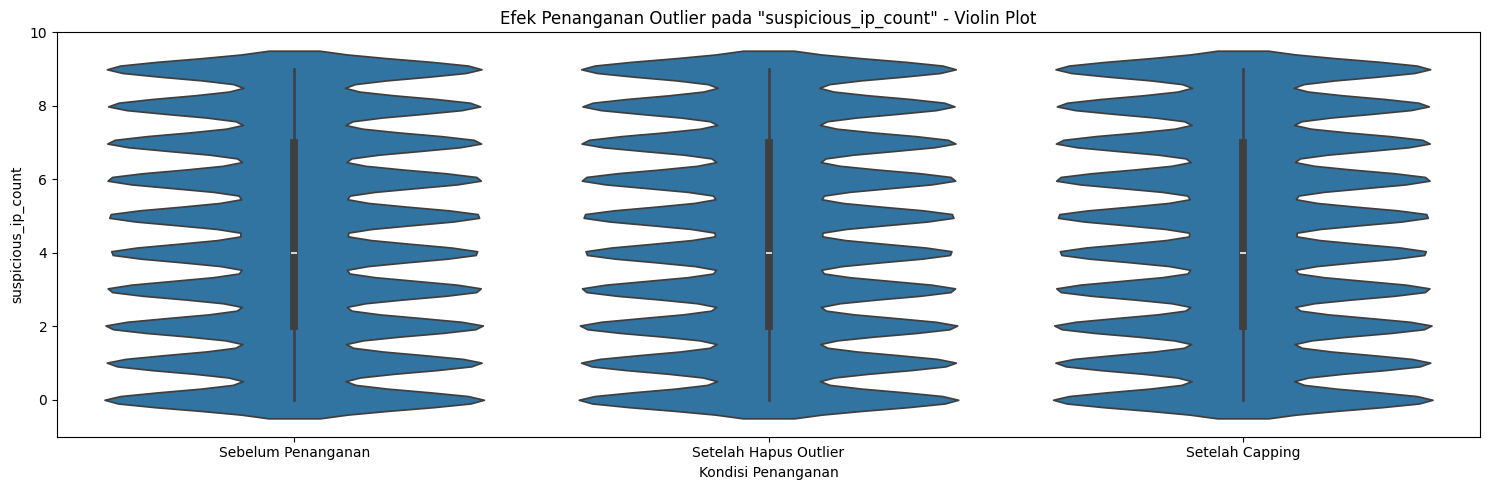

/tmp/ipython-input-4132717762.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_cap.loc[df_cap[col] < lower, col] = lower
/tmp/ipython-input-4132717762.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_cap.loc[df_cap[col] < lower, col] = lower


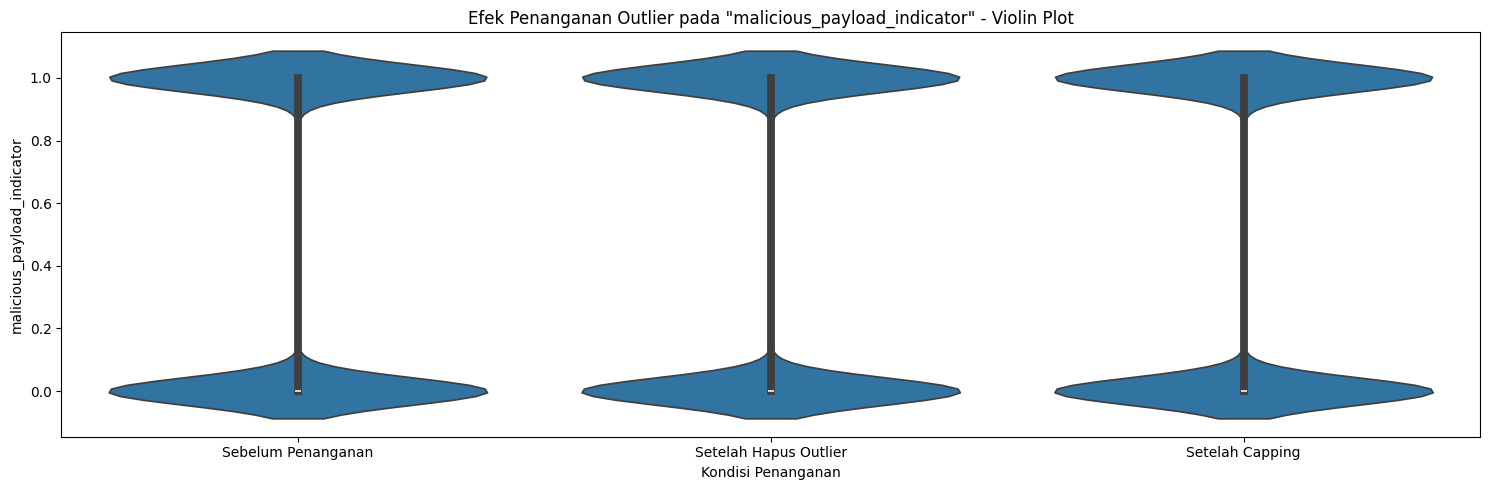

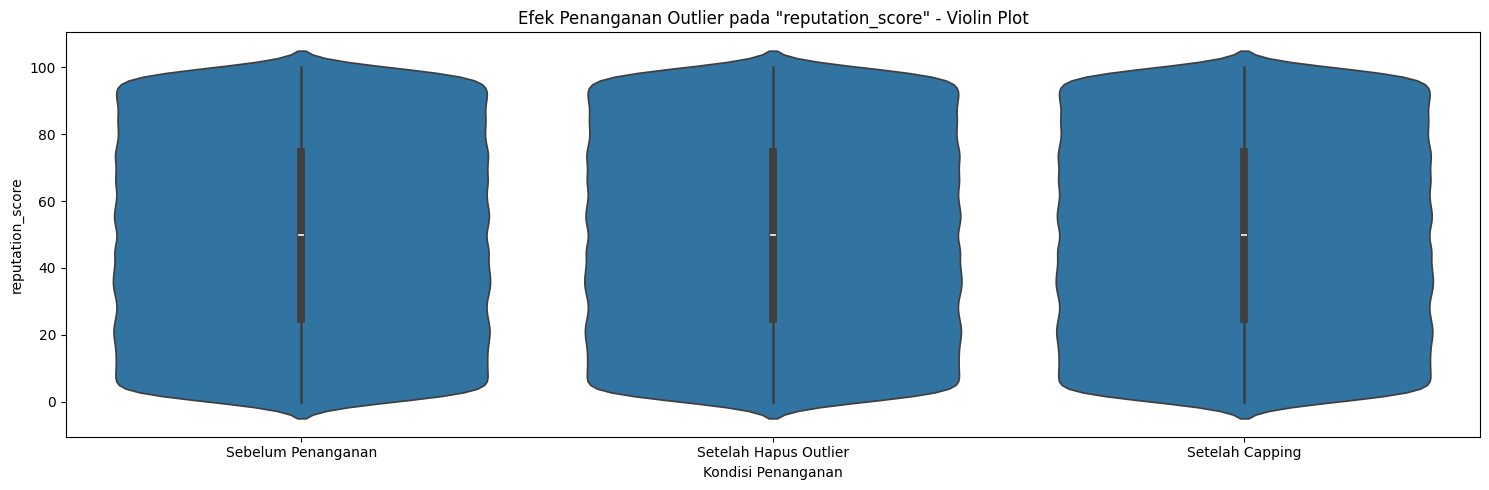

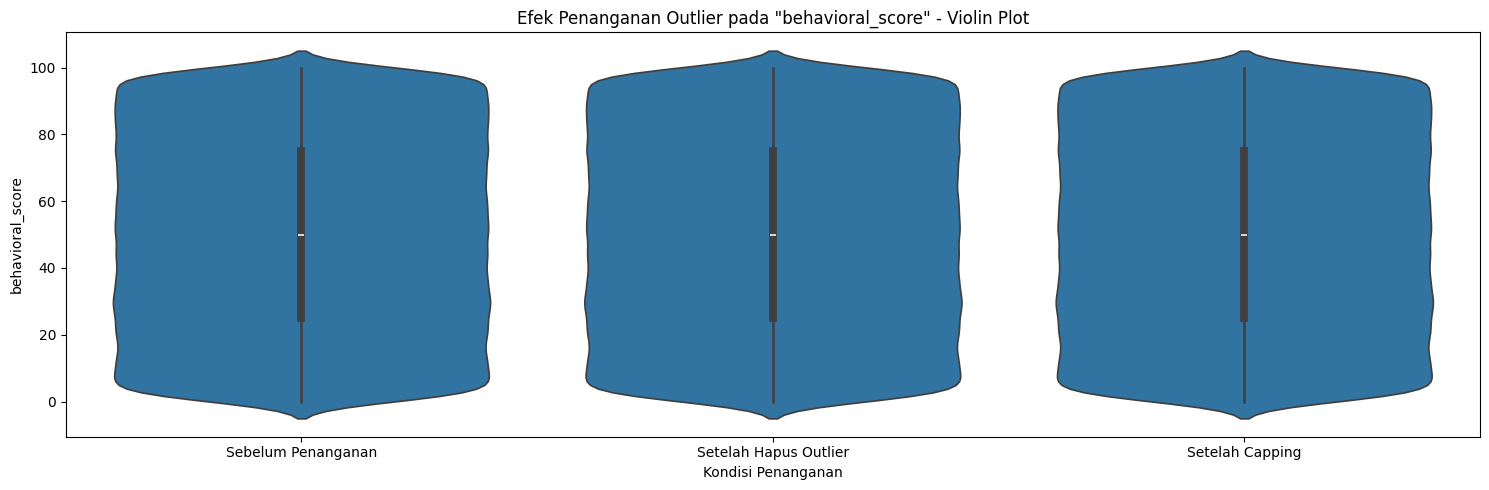

/tmp/ipython-input-4132717762.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_cap.loc[df_cap[col] < lower, col] = lower
/tmp/ipython-input-4132717762.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_cap.loc[df_cap[col] < lower, col] = lower


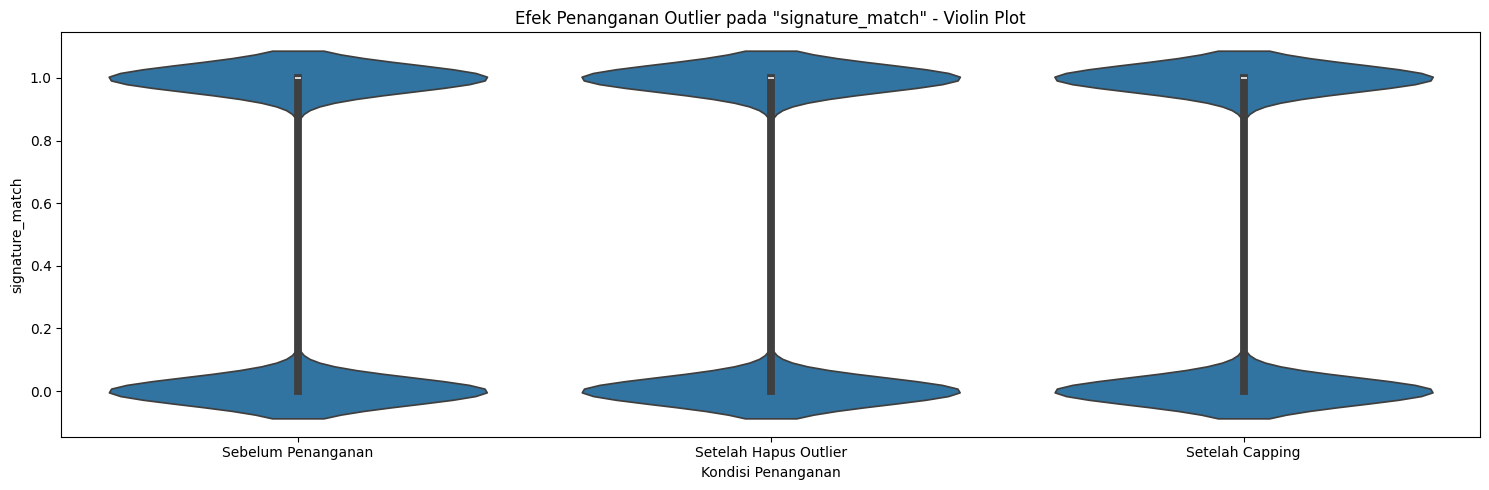

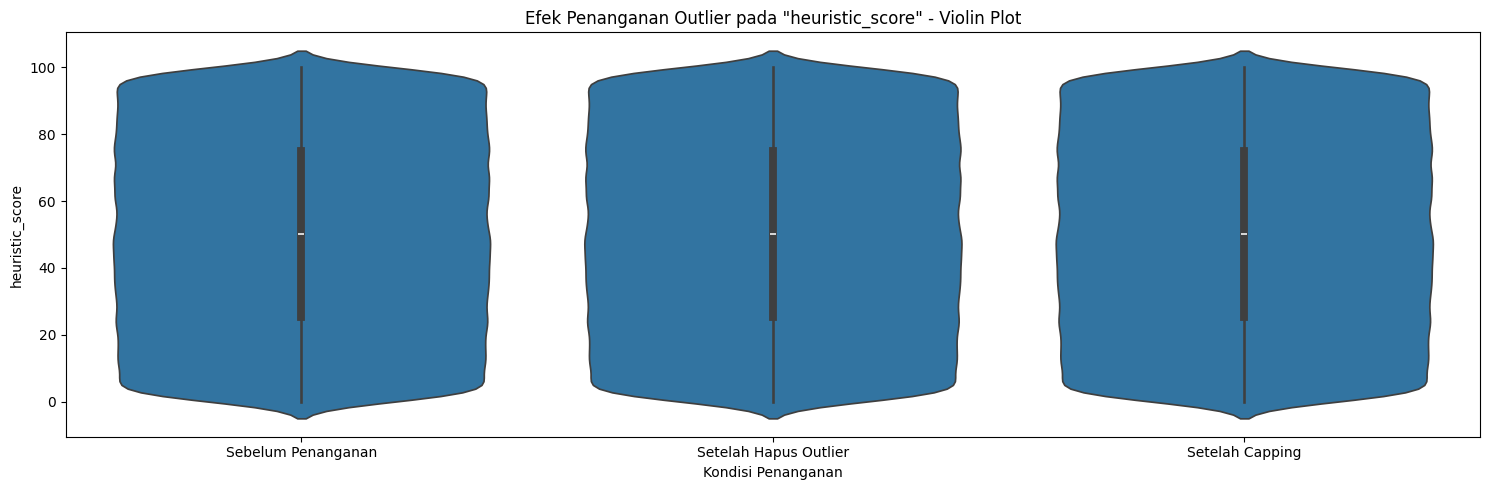

In [138]:
# --- Bagian Penanganan Outlier ---
# Membuat salinan dataset untuk menerapkan strategi penanganan outlier tanpa mengubah data asli
data1_handled_delete = data1.copy()
data1_handled_cap = data1.copy()
data1_handled_median = data1.copy()
data2_handled_delete = data2.copy()
data2_handled_cap = data2.copy()
data2_handled_median = data2.copy()

# Fungsi untuk menghitung batas bawah dan atas menggunakan metode IQR
def get_iqr_bounds(df, col, multiplier=1.5):
    """Menghitung batas outlier menggunakan metode IQR."""
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    return lower_bound, upper_bound

# Fungsi untuk menghapus baris yang mengandung outlier pada kolom tertentu
def remove_outliers(df, col, multiplier=1.5):
    """Menghapus baris dengan outlier berdasarkan metode IQR."""
    lower, upper = get_iqr_bounds(df, col, multiplier)
    mask = (df[col] >= lower) & (df[col] <= upper)
    return df[mask]

# Fungsi untuk mengganti outlier dengan nilai batas (capping)
def cap_outliers(df, col, multiplier=1.5):
    """Melakukan capping (membatasi) outlier berdasarkan metode IQR."""
    lower, upper = get_iqr_bounds(df, col, multiplier)
    df_cap = df.copy()
    # Mengganti nilai di bawah batas bawah dengan batas bawah
    df_cap.loc[df_cap[col] < lower, col] = lower
    # Mengganti nilai di atas batas atas dengan batas atas
    df_cap.loc[df_cap[col] > upper, col] = upper
    return df_cap

# Fungsi untuk mengisi outlier dengan nilai median kolom
def replace_outliers_with_median(df, col, multiplier=1.5):
    """Mengganti outlier dengan nilai median kolom."""
    lower, upper = get_iqr_bounds(df, col, multiplier)
    median_val = df[col].median()
    df_med = df.copy()
    # Mengganti nilai outlier (baik di bawah batas bawah atau di atas batas atas) dengan median
    df_med.loc[(df_med[col] < lower) | (df_med[col] > upper), col] = median_val
    return df_med

# Identifikasi kolom numerik untuk analisis outlier
numeric_cols_data1 = data1.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols_data2 = data2.select_dtypes(include=[np.number]).columns.tolist()

# --- Penerapan Strategi Penanganan Outlier untuk Data1 ---
print("\n=== PENERAPAN STRATEGI PENANGANAN OUTLIER UNTUK DATA1 ===")

# Menyimpan jumlah baris asli
original_shape_data1 = data1.shape[0]

# 1. HAPUS OUTLIER (Deletion) - Diterapkan secara berurutan pada setiap kolom
print("\n--- 1. HAPUS OUTLIER (Deletion) ---")
for col in numeric_cols_data1:
    # Memastikan kolom memiliki variasi sebelum menghapus outlier
    if data1[col].dropna().std() > 0:
        data1_handled_delete = remove_outliers(data1_handled_delete, col)
        print(f"  Setelah hapus outlier di '{col}': Shape = {data1_handled_delete.shape}")
print(f"  Final shape setelah hapus semua outlier secara berurutan: {data1_handled_delete.shape}")
# Menghitung persentase baris yang terhapus
rows_deleted_data1 = original_shape_data1 - data1_handled_delete.shape[0]
percent_deleted_data1 = (rows_deleted_data1 / original_shape_data1 * 100) if original_shape_data1 > 0 else 0
print(f"  Total baris terhapus: {rows_deleted_data1} ({percent_deleted_data1:.2f}%)")


# 2. CAPPING OUTLIER (Winsorizing) - Diterapkan pada salinan data asli
print("\n--- 2. CAPPING OUTLIER (Winsorizing) ---")
# Iterasi melalui setiap kolom numerik untuk melakukan capping
for col in numeric_cols_data1:
     # Memastikan kolom memiliki variasi sebelum capping
    if data1[col].dropna().std() > 0:
        data1_handled_cap = cap_outliers(data1_handled_cap, col)
# Menampilkan shape data setelah capping (jumlah baris tetap sama)
print(f"  Shape setelah capping: {data1_handled_cap.shape} (tidak ada baris terhapus)")


# 3. ISI DENGAN MEDIAN - Diterapkan pada salinan data asli
print("\n--- 3. ISI OUTLIER DENGAN MEDIAN ---")
# Iterasi melalui setiap kolom numerik untuk mengganti outlier dengan median
for col in numeric_cols_data1:
    # Memastikan kolom memiliki variasi sebelum mengisi outlier
    if data1[col].dropna().std() > 0:
        data1_handled_median = replace_outliers_with_median(data1_handled_median, col)
# Menampilkan shape data setelah mengisi outlier dengan median (jumlah baris tetap sama)
print(f"  Shape setelah mengisi outlier dengan median: {data1_handled_median.shape} (tidak ada baris terhapus)")

# Opsional: Verifikasi Visualisasi (Boxplot) Setelah Penanganan Capping untuk Data1
print("\n--- Verifikasi Visual (Boxplot Setelah Capping - Data1) ---")
plt.figure(figsize=(15, 10))
# Menampilkan boxplot untuk beberapa kolom pertama setelah capping
for i, col in enumerate(numeric_cols_data1[:6], 1): # Hanya menampilkan 6 kolom pertama sebagai contoh
    plt.subplot(2, 3, i) # Membuat subplot dalam grid 2x3
    sns.boxplot(y=data1_handled_cap[col].dropna()) # Membuat boxplot
    plt.title(f'Boxplot Setelah Capping - {col}') # Judul subplot
plt.tight_layout() # Menyesuaikan layout agar tidak tumpang tindih
plt.show() # Menampilkan plot


# --- Penerapan Strategi Penanganan Outlier untuk Data2 ---
print("\n=== PENERAPAN STRATEGI PENANGANAN OUTLIER UNTUK DATA2 ===")

# Menyimpan jumlah baris asli
original_shape_data2 = data2.shape[0]

# 1. HAPUS OUTLIER (Deletion) - Diterapkan secara berurutan pada setiap kolom
print("\n--- 1. HAPUS OUTLIER (Deletion) ---")
for col in numeric_cols_data2:
    # Memastikan kolom memiliki variasi sebelum menghapus outlier
    if data2[col].dropna().std() > 0:
        data2_handled_delete = remove_outliers(data2_handled_delete, col)
        print(f"  Setelah hapus outlier di '{col}': Shape = {data2_handled_delete.shape}")
print(f"  Final shape setelah hapus semua outlier secara berurutan: {data2_handled_delete.shape}")
# Menghitung persentase baris yang terhapus
rows_deleted_data2 = original_shape_data2 - data2_handled_delete.shape[0]
percent_deleted_data2 = (rows_deleted_data2 / original_shape_data2 * 100) if original_shape_data2 > 0 else 0
print(f"  Total baris terhapus: {rows_deleted_data2} ({percent_deleted_data2:.2f}%)")

# 2. CAPPING OUTLIER (Winsorizing) - Diterapkan pada salinan data asli
print("\n--- 2. CAPPING OUTLIER (Winsorizing) ---")
# Iterasi melalui setiap kolom numerik untuk melakukan capping
for col in numeric_cols_data2:
    # Memastikan kolom memiliki variasi sebelum capping
    if data2[col].dropna().std() > 0:
        data2_handled_cap = cap_outliers(data2_handled_cap, col)
# Menampilkan shape data setelah capping (jumlah baris tetap sama)
print(f"  Shape setelah capping: {data2_handled_cap.shape} (tidak ada baris terhapus)")

# 3. ISI DENGAN MEDIAN - Diterapkan pada salinan data asli
print("\n--- 3. ISI OUTLIER DENGAN MEDIAN ---")
# Iterasi melalui setiap kolom numerik untuk mengganti outlier dengan median
for col in numeric_cols_data2:
    # Memastikan kolom memiliki variasi sebelum mengisi outlier
    if data2[col].dropna().std() > 0:
        data2_handled_median = replace_outliers_with_median(data2_handled_median, col)
# Menampilkan shape data setelah mengisi outlier dengan median (jumlah baris tetap sama)
print(f"  Shape setelah mengisi outlier dengan median: {data2_handled_median.shape} (tidak ada baris terhapus)")


# Opsional: Verifikasi Visualisasi (Boxplot) Setelah Penanganan Capping untuk Data2
print("\n--- Verifikasi Visual (Boxplot Setelah Capping - Data2) ---")
plt.figure(figsize=(15, 10))
# Menampilkan boxplot untuk beberapa kolom pertama setelah capping
for i, col in enumerate(numeric_cols_data2[:6], 1): # Hanya menampilkan 6 kolom pertama sebagai contoh
    plt.subplot(2, 3, i) # Membuat subplot dalam grid 2x3
    sns.boxplot(y=data2_handled_cap[col].dropna()) # Membuat boxplot
    plt.title(f'Boxplot Setelah Capping - {col}') # Judul subplot
plt.tight_layout() # Menyesuaikan layout agar tidak tumpang tindih
plt.show() # Menampilkan plot


# Opsional: Transformasi Log untuk kolom skewed (jika data >0, contoh untuk kolom tertentu)
print("\n--- 4. TRANSFORMASI LOG (Opsional untuk Skewed Data) ---")

# Contoh: Terapkan log pada kolom 'traffic_volume' di data1 jika >0
if 'traffic_volume' in numeric_cols_data1:
    data1_log = data1.copy()
    # Pastikan kolom adalah numerik sebelum transformasi log
    if pd.api.types.is_numeric_dtype(data1_log['traffic_volume']):
        data1_log['traffic_volume_log'] = np.log1p(data1_log['traffic_volume'].clip(lower=0))  # log(1+x) untuk handle 0
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        sns.boxplot(y=data1['traffic_volume'].dropna())
        plt.title('Sebelum Log Transform')
        plt.subplot(1, 2, 2)
        sns.boxplot(y=data1_log['traffic_volume_log'].dropna())
        plt.title('Setelah Log Transform')
        plt.tight_layout()
        plt.show()
    else:
        print("Kolom 'traffic_volume' bukan tipe numerik, tidak bisa terapkan transformasi log.")


# Ringkasan Statistik Setelah Penanganan (contoh untuk capping)
print("\n=== RINGKASAN STATISTIK SETELAH PENANGANAN (Capping) ===")
print("Data1 setelah capping:")
display(data1_handled_cap[numeric_cols_data1].describe().round(2))
print("\nData2 setelah capping:")
display(data2_handled_cap[numeric_cols_data2].describe().round(2))


# Visualisasi efek penanganan outlier pada Data2 menggunakan Violin Plots
print("\n=== VISUALISASI EFEK PENANGANAN OUTLIER PADA DATA2 (VIOLIN PLOT) ===")

for col in numeric_cols_data2:
    if data2[col].dropna().std() > 0:  # Hanya untuk kolom dengan variasi
        plt.figure(figsize=(15, 5))

        # Create a temporary DataFrame for plotting
        plot_df = pd.DataFrame({
            'Nilai': pd.concat([
                data2[col].rename('Sebelum Penanganan'),
                remove_outliers(data2.copy(), col)[col].rename('Setelah Hapus Outlier'),
                cap_outliers(data2.copy(), col)[col].rename('Setelah Capping')
            ]),
            'Kondisi': pd.concat([
                pd.Series('Sebelum Penanganan', index=data2[col].index),
                pd.Series('Setelah Hapus Outlier', index=remove_outliers(data2.copy(), col).index),
                pd.Series('Setelah Capping', index=cap_outliers(data2.copy(), col).index)
            ])
        })

        sns.violinplot(x='Kondisi', y='Nilai', data=plot_df.dropna())
        plt.title(f'Efek Penanganan Outlier pada "{col}" - Violin Plot')
        plt.xlabel("Kondisi Penanganan")
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()

Strategi penanganan outlier (Hapus, Capping, Imputasi)

# 3. Univariate Analysis
  - Distribusi variabel numerik (histogram, KDE plot, boxplot)  
  - Distribusi variabel kategorikal (barplot, pie chart, frekuensi)  
  - Statistik ringkas per variabel

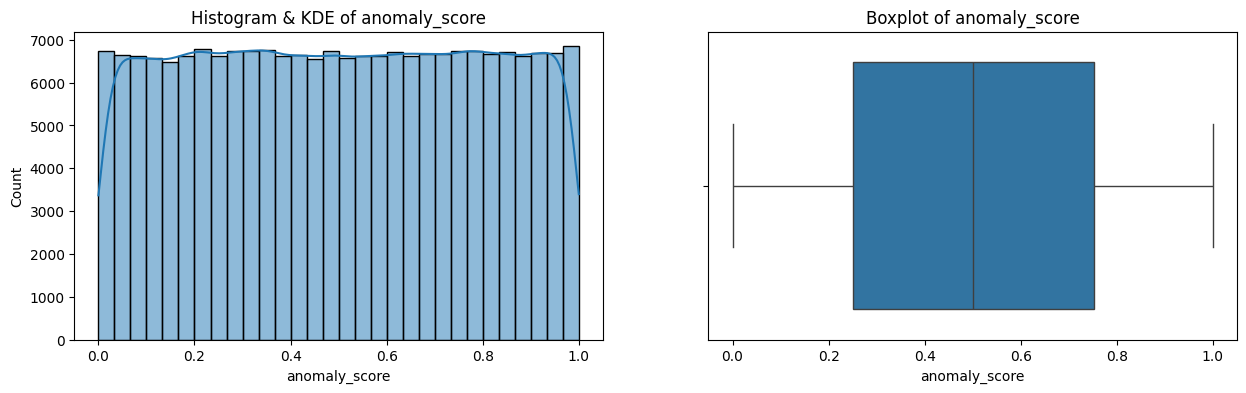

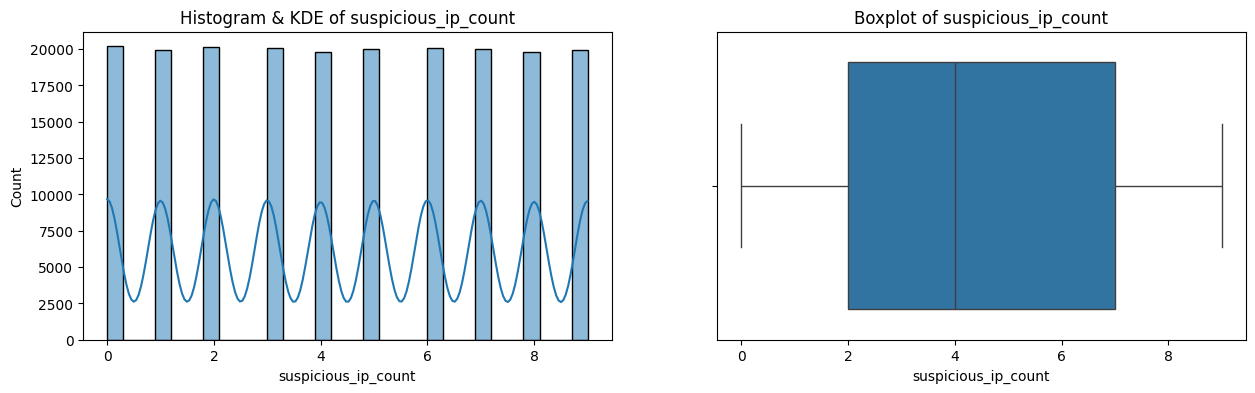

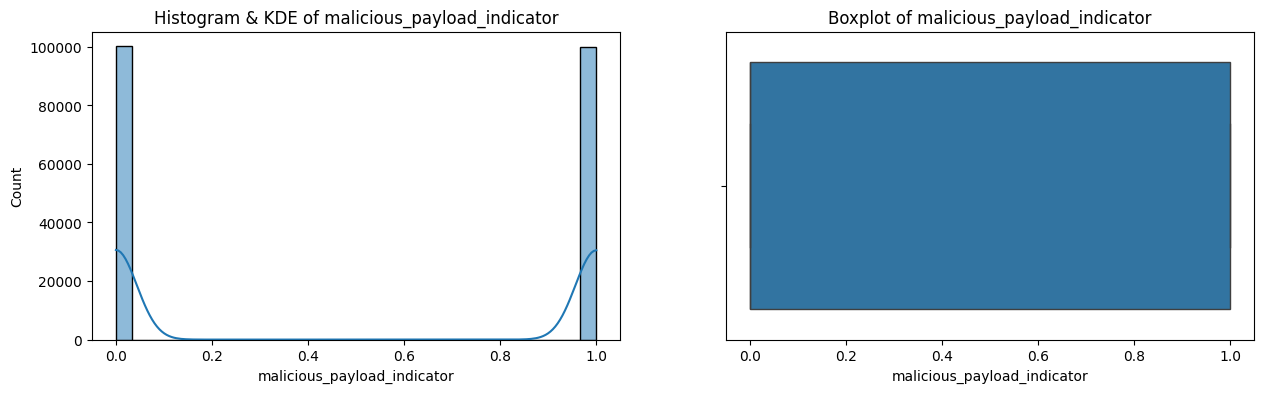

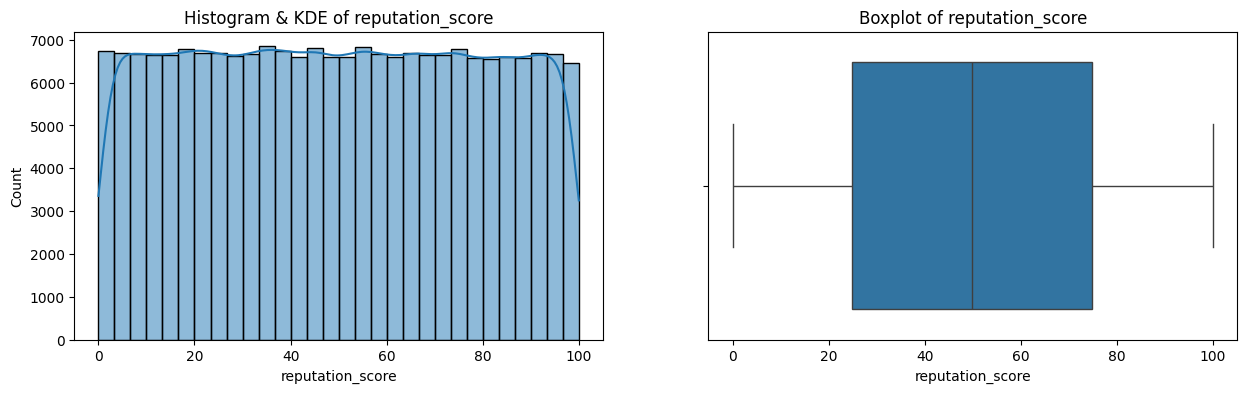

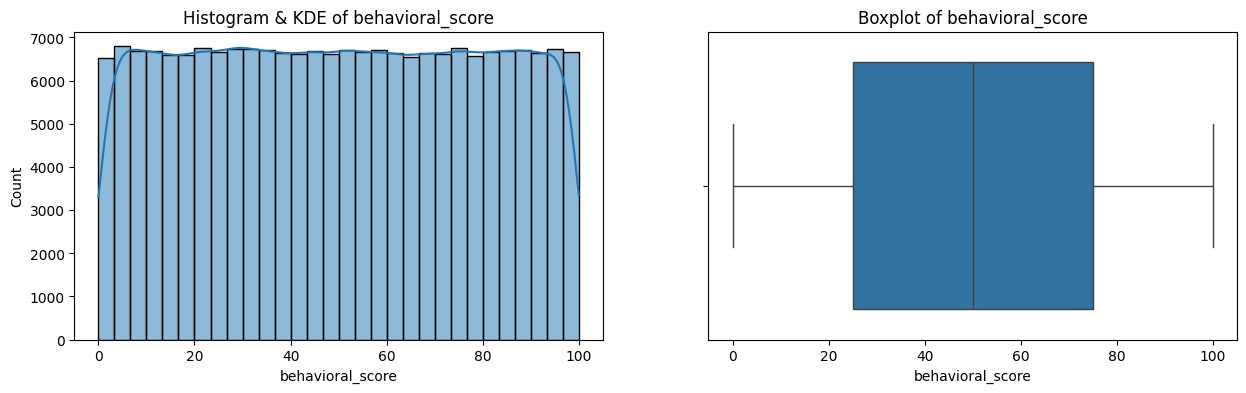

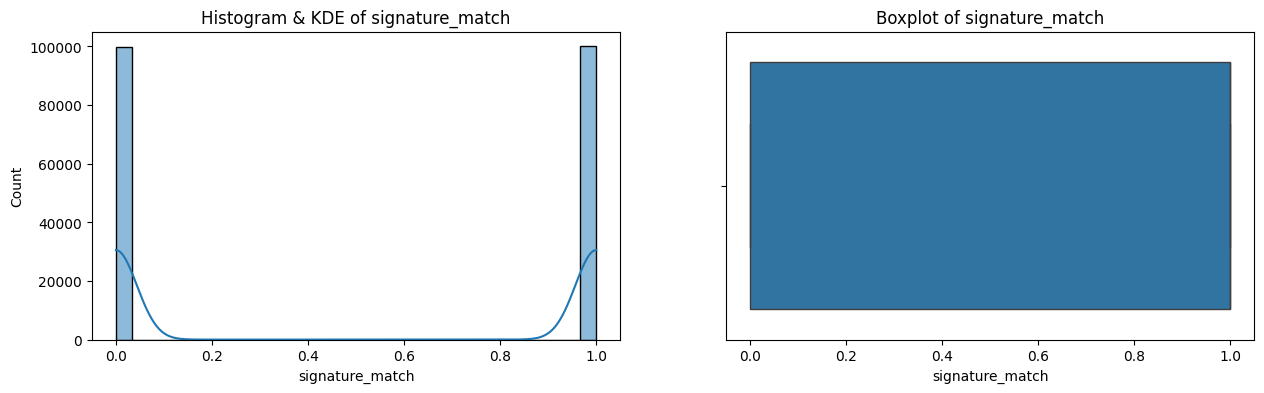

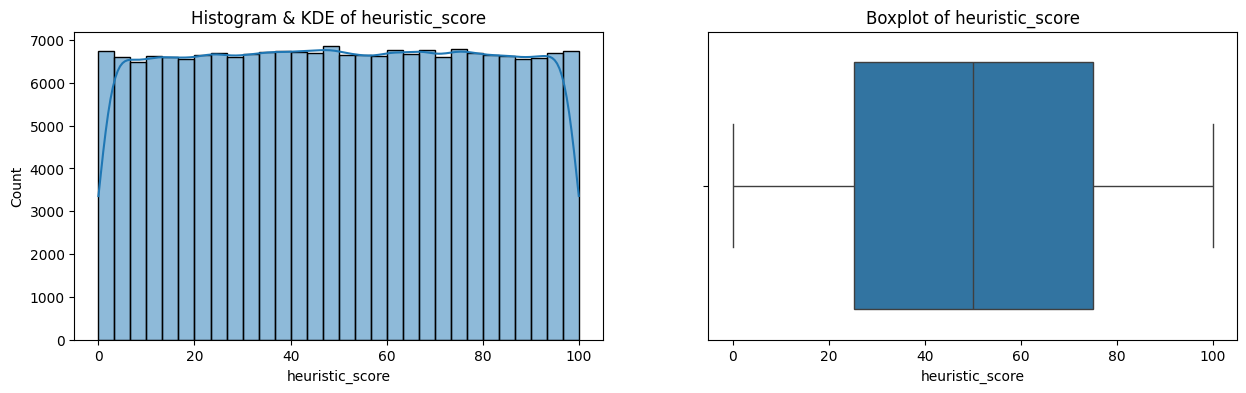

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- untuk malware_df ---
numeric_cols = data2.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(15,4))

    # Histogram + KDE
    plt.subplot(1,2,1)
    sns.histplot(data2[col], kde=True, bins=30)
    plt.title(f"Histogram & KDE of {col}")

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=data2[col])
    plt.title(f"Boxplot of {col}")

    plt.show()

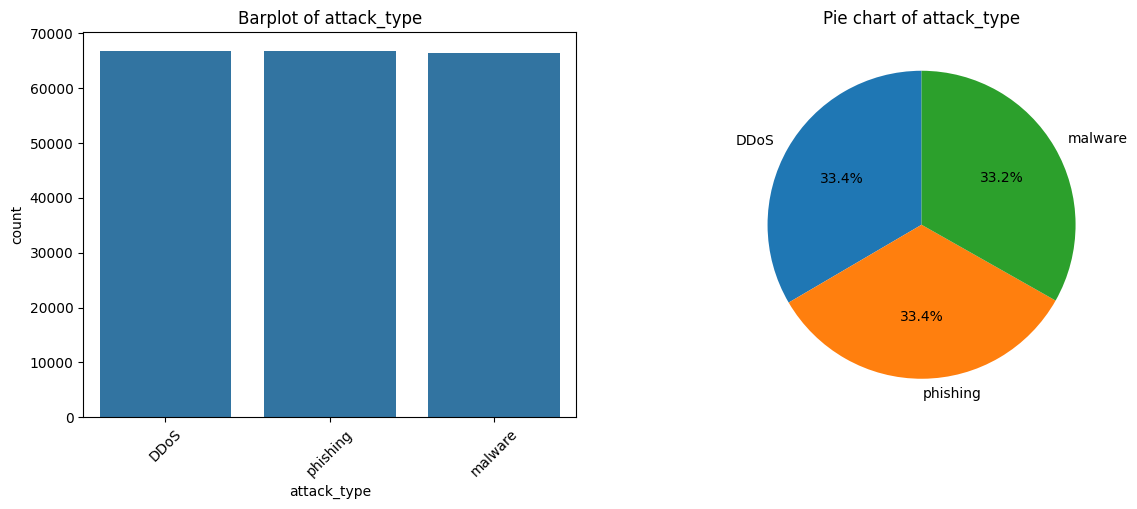

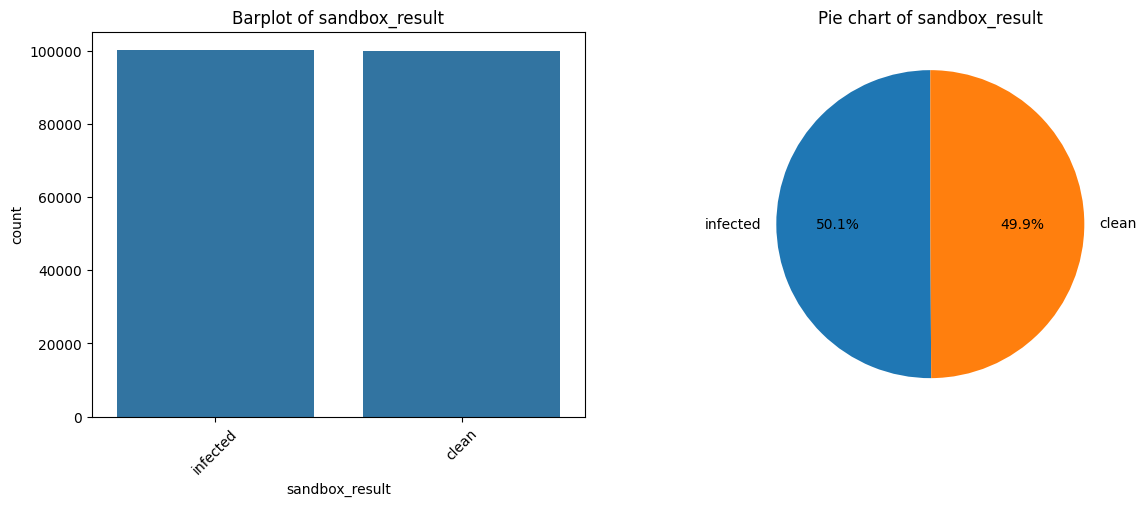

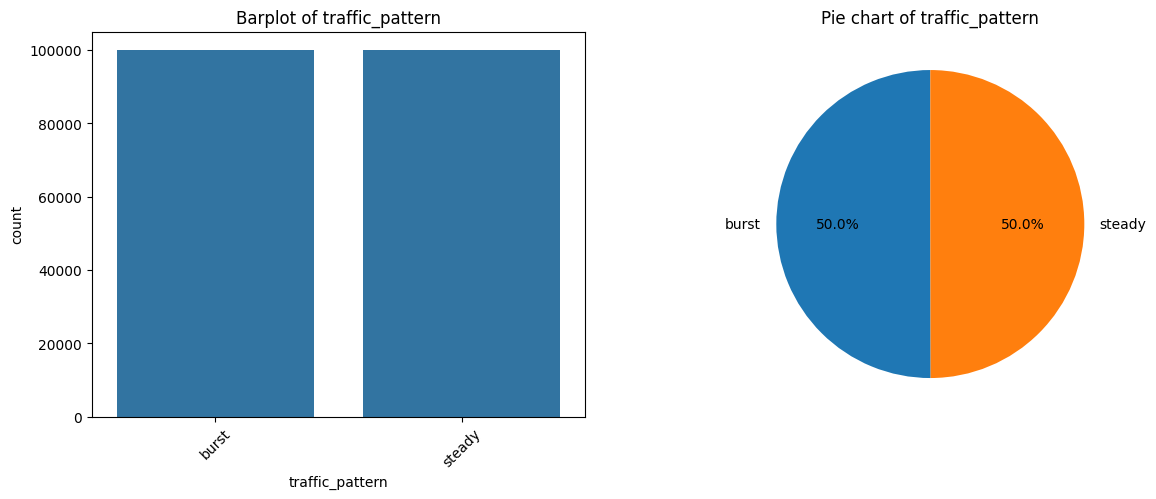

In [140]:
# --- untuk malware_df ---
categorical_cols = data2.select_dtypes(include=['object']).columns

for col in categorical_cols:
    plt.figure(figsize=(14,5))

    # Barplot
    plt.subplot(1,2,1)
    sns.countplot(x=data2[col], order=data2[col].value_counts().index)
    plt.title(f"Barplot of {col}")
    plt.xticks(rotation=45)

    # Pie chart
    plt.subplot(1,2,2)
    data2[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f"Pie chart of {col}")
    plt.ylabel("")

    plt.show()

In [ ]:
# Statistik numerik
print("📊 Statistik Ringkas (Numerik)")
display(data2.describe().T)

# Statistik kategorikal
print("\n📊 Statistik Ringkas (Kategorikal)")
for col in categorical_cols:
    print(f"\nKolom: {col}")
    print(data2[col].value_counts())

Untuk memahami karakteristik data, analisis dilakukan melalui tiga tahap utama. Pertama, variabel numerik divisualisasikan dengan histogram, KDE plot, dan boxplot untuk melihat bentuk distribusi serta mendeteksi adanya outlier. Kedua, variabel kategorikal dianalisis dengan barplot dan pie chart untuk mengetahui frekuensi dan proporsi tiap kategori, seperti jenis serangan atau protokol. Ketiga, dihitung statistik ringkas berupa nilai minimum, maksimum, rata-rata, kuartil, dan distribusi frekuensi kategori. Hasil analisis ini memberikan gambaran umum pola data dan menjadi dasar identifikasi pola serangan jaringan.


# 4. Bivariate Analysis
  - Numerik vs numerik: scatter plot, korelasi  
  - Numerik vs kategorikal: boxplot, violin plot, uji t/ANOVA  
  - Kategorikal vs kategorikal: crosstab, chi-square test, stacked barplot

### Merging Data1 and Data2

In [142]:
# Merge data1 and data2 based on index
# Assuming the rows in both dataframes correspond to the same observations
data_merged = pd.merge(data1, data2, left_index=True, right_index=True)

# Display the first few rows of the merged dataframe
display(data_merged.head())

# Check the shape of the merged dataframe
print("\nShape of merged dataframe:", data_merged.shape)

timestamp        source_ip  destination_ip  source_port  \
0 2024-06-28 19:02:55   86.230.134.129      3.46.98.34         3756   
1 2022-12-09 13:36:47   37.211.177.132   40.109.190.27        44591   
2 2022-08-22 04:59:38     54.129.79.47   77.250.43.217        43637   
3 2023-02-07 15:30:41    157.59.116.46  211.120.32.204        53440   
4 2020-12-08 21:06:49  161.125.154.101      62.15.8.89        46915   

   destination_port protocol  packet_length          payload_data flag  \
0             35357     ICMP            497   Theory hear parent.  ACK   
1             30823     ICMP            103  Trade indicate fill.  SYN   
2             60156      TCP            169        Political put.  FIN   
3             17944      UDP             51    Already really of.  SYN   
4              3390     ICMP            349     Least under sort.  ACK   

   traffic_volume  ...  anomaly_score  suspicious_ip_count  \
0       95.706008  ...       0.687331                    5   
1      209.420013  ...       0.519249                    2   
2       68.588853  ...       0.363944                    7   
3      218.471503  ...       0.890735                    9   
4      712.184191  ...       0.686994                    8   

   malicious_payload_indicator  reputation_score  behavioral_score  \
0                            1         82.673157         24.141808   
1                            1         27.140515         69.788583   
2                            0         21.243343         53.630703   
3                            0         76.188191         41.066927   
4                            0         12.935845          6.254213   

   attack_type  signature_match  sandbox_result  heuristic_score  \
0      malware                1        infected         3.952639   
1     phishing                1           clean        57.429668   
2     phishing                0           clean        98.507689   
3     phishing                1        infected        40.119337   
4         DDoS                0           clean        79.303526   

   traffic_pattern  
0            burst  
1           steady  
2           steady  
3           steady  
4           steady  

[5 rows x 44 columns]


Shape of merged dataframe: (200000, 44)


## 4.1 Numerik vs numerik: scatter plot, korelasi
| Data1 (Network)    | Data2 (Malware)        | Alasan Hubungan                                                      |
| ------------------ | ---------------------- | -------------------------------------------------------------------- |
| `traffic_volume`   | `threat_score`         | Lalu lintas yang lebih besar dapat meningkatkan potensi ancaman.     |

### 4.1.1 Korelasi Traffic Volume Jaringan dan Skor Ancaman Malware

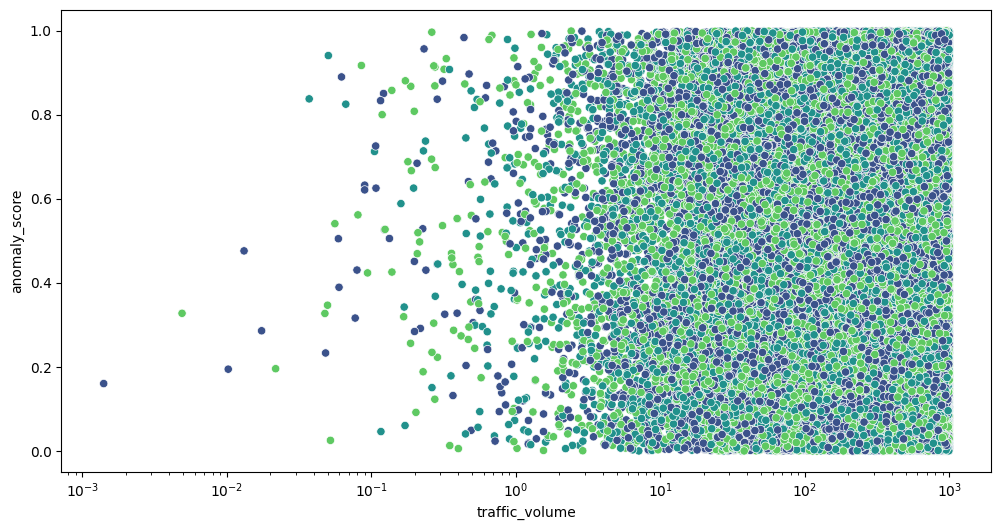

In [143]:
# Scatter plot dengan skala log
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x='traffic_volume',
    y='anomaly_score',
    hue='attack_type',
    data=data_merged,
    palette='viridis',
    legend=False
)
plt.xscale('log')
plt.show()

Plot menunjukkan bahwa volume lalu lintas jaringan (traffic\_volume) dan skor anomali (anomaly\_score) tidak memiliki hubungan linear yang jelas, karena setiap jenis serangan—malware, phishing, maupun DDoS—tersebar di seluruh rentang skor anomali. Namun, pola yang tampak adalah serangan DDoS cenderung lebih banyak muncul pada traffic volume tinggi, sesuai karakteristiknya yang menghasilkan lalu lintas besar, sedangkan malware dan phishing muncul di berbagai tingkat trafik. Hal ini menegaskan bahwa volume trafik saja tidak cukup untuk membedakan jenis serangan sehingga diperlukan fitur tambahan untuk analisis deteksi yang lebih akurat.


## 4.2 Numerik vs kategorikal: boxplot, violin plot, uji t/ANOVA
| Data1 (Numerik)    | Data2 (Kategorikal) | Alasan Hubungan                                                          |
| ------------------ | ------------------- | ------------------------------------------------------------------------ |
| `traffic_volume`   | `attack_type`       | Volume traffic mungkin berbeda antar jenis serangan (DoS, malware, dll). |

### 4.2.1 Distribusi Volume Lalu Lintas per Jenis Serangan

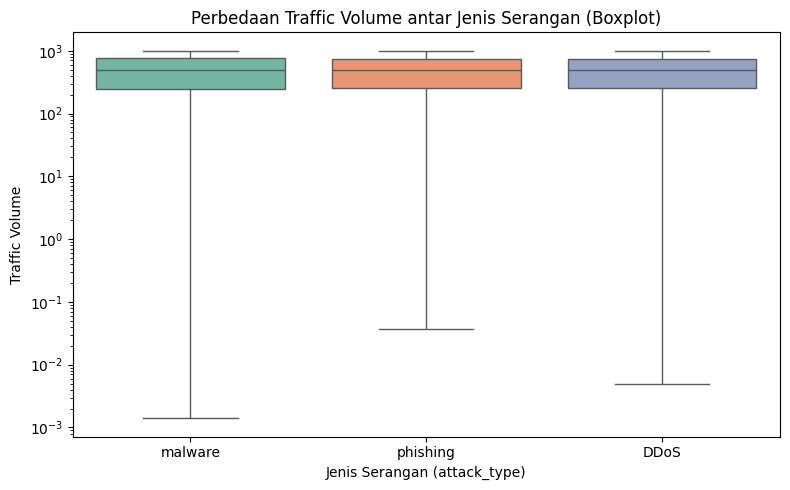

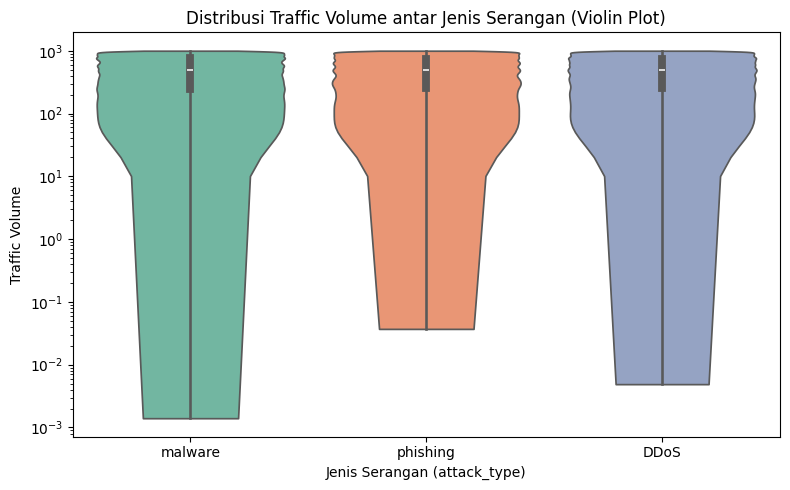

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# --- Boxplot ---
plt.figure(figsize=(8,5))
sns.boxplot(
    x='attack_type',
    y='traffic_volume',
    hue='attack_type',      # <--- tambahkan
    legend=False,           # <--- matikan legend supaya tidak dobel
    data=data_merged,
    palette='Set2'
)
plt.yscale('log')       # skala log agar distribusi traffic terlihat lebih jelas
plt.title("Perbedaan Traffic Volume antar Jenis Serangan (Boxplot)")
plt.xlabel("Jenis Serangan (attack_type)")
plt.ylabel("Traffic Volume")
plt.tight_layout()
plt.show()

# --- Violin plot ---
plt.figure(figsize=(8,5))
sns.violinplot(
    x='attack_type',
    y='traffic_volume',
    hue='attack_type',   # <-- tambahkan
    data=data_merged,
    palette='Set2',
    legend=False,        # hilangkan legend ganda
    cut=0
)
plt.yscale('log')
plt.title("Distribusi Traffic Volume antar Jenis Serangan (Violin Plot)")
plt.xlabel("Jenis Serangan (attack_type)")
plt.ylabel("Traffic Volume")
plt.tight_layout()
plt.show()

Kedua grafik (boxplot dan violin plot) menunjukkan distribusi traffic volume pada tiga jenis serangan berbeda (malware, phishing, dan DDoS). Boxplot memperlihatkan ringkasan statistik (median, kuartil, dan outlier) di mana terlihat bahwa ketiga jenis serangan memiliki rentang distribusi yang lebar dengan sebagian besar data terkonsentrasi di traffic volume tinggi (sekitar ratusan hingga ribuan). Sementara itu, violin plot memberikan gambaran lebih detail tentang bentuk distribusi data: terlihat bahwa distribusi traffic volume pada setiap jenis serangan cenderung mirip dengan konsentrasi besar di nilai tinggi, tetapi tetap ada variasi yang luas di nilai rendah hingga ekstrem. Dengan demikian, meskipun ada sedikit variasi antar jenis serangan, secara umum ketiganya menunjukkan pola distribusi traffic volume yang hampir sama, sehingga sulit menyimpulkan bahwa jenis serangan tertentu selalu menghasilkan traffic volume yang lebih besar atau lebih kecil dibandingkan lainnya.

## 4.3 Kategorikal vs kategorikal: crosstab, chi-square test, stacked barplot
| Data1 (Numerik)    | Data2 (Kategorikal) | Alasan Hubungan                                                          |
| ------------------ | ------------------- | ------------------------------------------------------------------------ |
| `traffic_volume`   | `attack_type`       | Volume traffic mungkin berbeda antar jenis serangan (DoS, malware, dll). |

### 4.3.1 Distribusi Jenis Protokol pada Berbagai Tipe Serangan

Crosstab Traffic Volume vs Attack Type:


attack_type               DDoS  malware  phishing
traffic_volume_category                          
Very Low                 13280    13374     13345
Low                      13387    13295     13375
Medium                   13419    13174     13270
High                     13468    13228     13370
Very High                13310    13314     13391

<Figure size 1200x600 with 0 Axes>

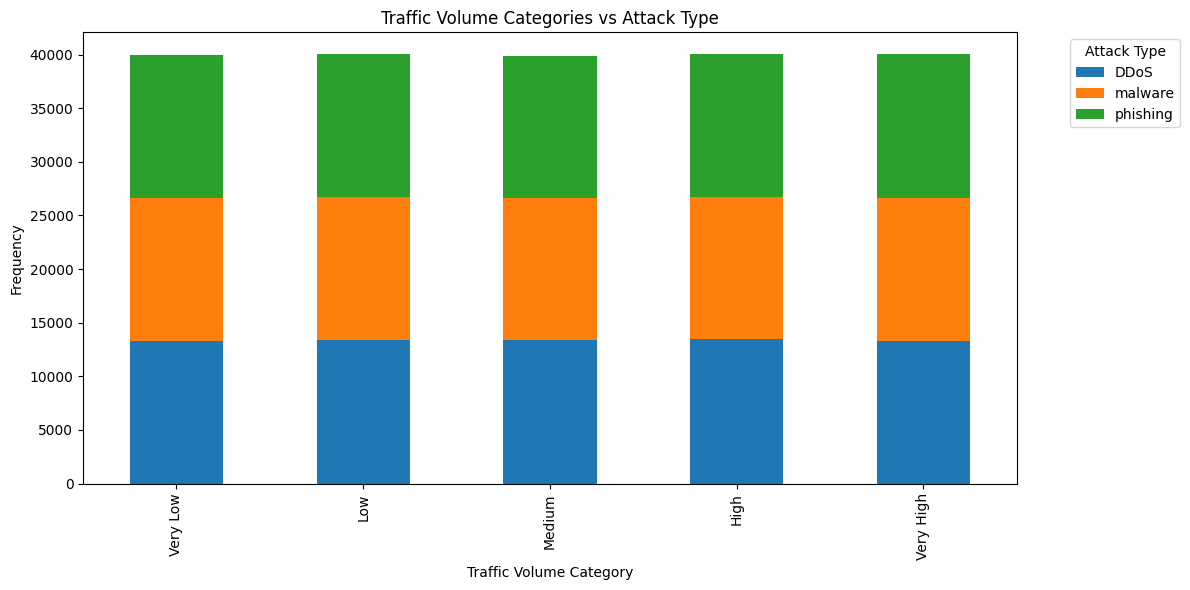


Chi-square Test Results:
Chi2 statistic: 3.6282
P-value: 0.8890
Degrees of freedom: 8
Significant association: No


In [145]:
# Crosstab antara traffic_volume (dikategorikan) dan attack_type
# Pertama, kategorikan traffic_volume
data_merged['traffic_volume_category'] = pd.cut(data_merged['traffic_volume'],
                                               bins=5,
                                               labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# Buat crosstab
crosstab_result = pd.crosstab(data_merged['traffic_volume_category'],
                             data_merged['attack_type'])

print("Crosstab Traffic Volume vs Attack Type:")
display(crosstab_result)

# Stacked bar plot
plt.figure(figsize=(12, 6))
crosstab_result.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Traffic Volume Categories vs Attack Type')
plt.xlabel('Traffic Volume Category')
plt.ylabel('Frequency')
plt.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Chi-square test
from scipy.stats import chi2_contingency
chi2, p_value, dof, expected = chi2_contingency(crosstab_result)
print(f"\nChi-square Test Results:")
print(f"Chi2 statistic: {chi2:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of freedom: {dof}")
print(f"Significant association: {'Yes' if p_value < 0.05 else 'No'}")

# 5. Multivariate Analysis
  - Heatmap korelasi  
  - Pairplot / scatter matrix  
  - PCA atau teknik dimensionality reduction (jika dataset besar)

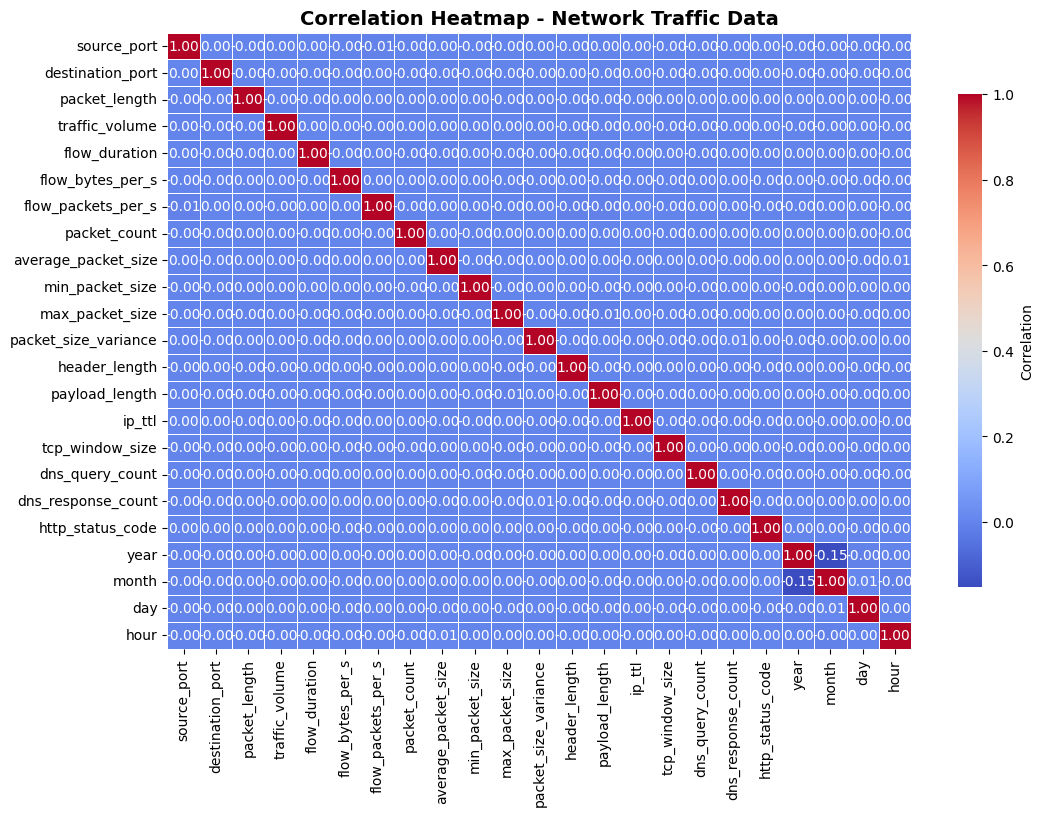

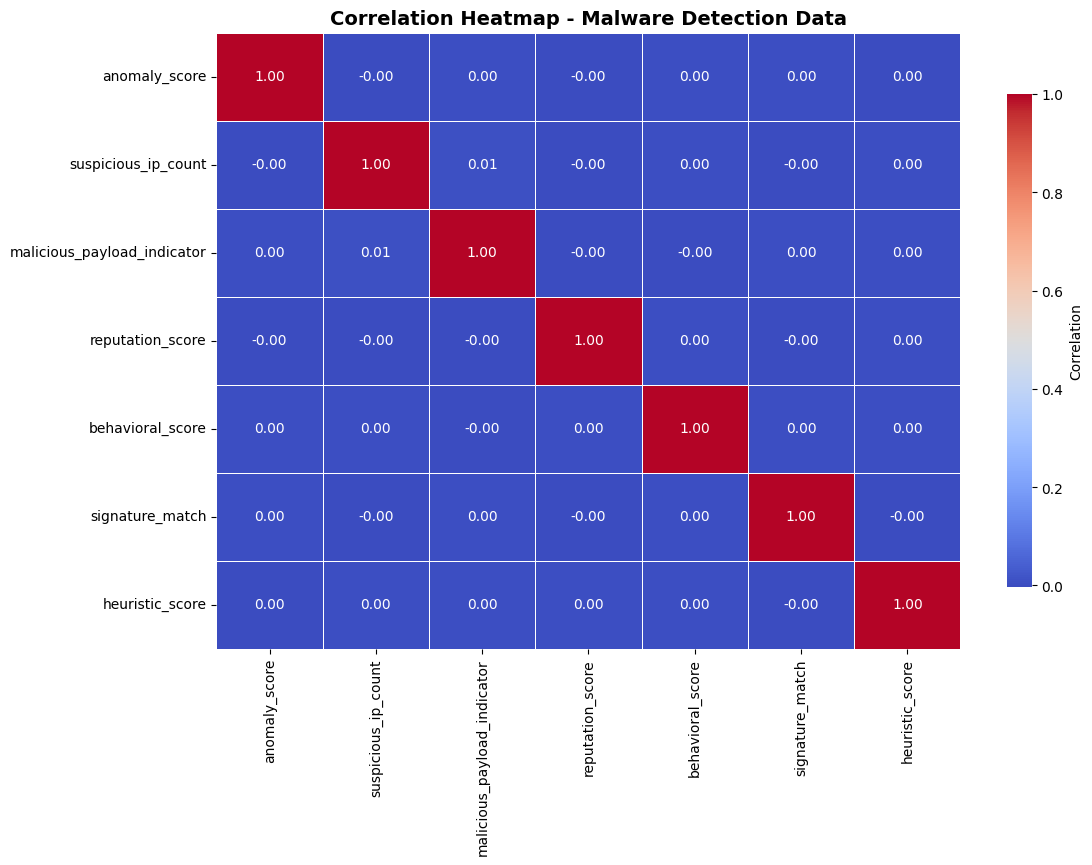

In [146]:
# Heatmap korelasi dengan tampilan lebih bagus
plt.figure(figsize=(12,8))
sns.heatmap(
    data1.corr(numeric_only=True),
    cmap="coolwarm",
    annot=True,           # tampilkan nilai korelasi
    fmt=".2f",            # format angka 2 desimal
    linewidths=0.5,       # kasih garis pemisah antar sel
    cbar_kws={'shrink': 0.8, 'label': 'Correlation'}  # colorbar lebih kecil + label
)
plt.title("Correlation Heatmap - Network Traffic Data", fontsize=14, fontweight="bold")
plt.show()

plt.figure(figsize=(12,8))
sns.heatmap(
    data2.corr(numeric_only=True),
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation'}
)
plt.title("Correlation Heatmap - Malware Detection Data", fontsize=14, fontweight="bold")
plt.show()


📊 Heatmap Korelasi

1. Range nilai korelasi

Nilai korelasi berada di rentang -1 sampai +1.

+1 → hubungan linear positif sempurna. Jika satu variabel naik, variabel lain juga naik dengan proporsi yang sama.

-1 → hubungan linear negatif sempurna. Jika satu variabel naik, variabel lain turun dengan proporsi yang sama.

0 → tidak ada hubungan linear yang jelas.




2. Warna pada heatmap

Merah pekat → korelasi positif tinggi.

Biru pekat → korelasi negatif tinggi.

Putih / warna pucat → korelasi sangat lemah atau hampir tidak ada hubungan.


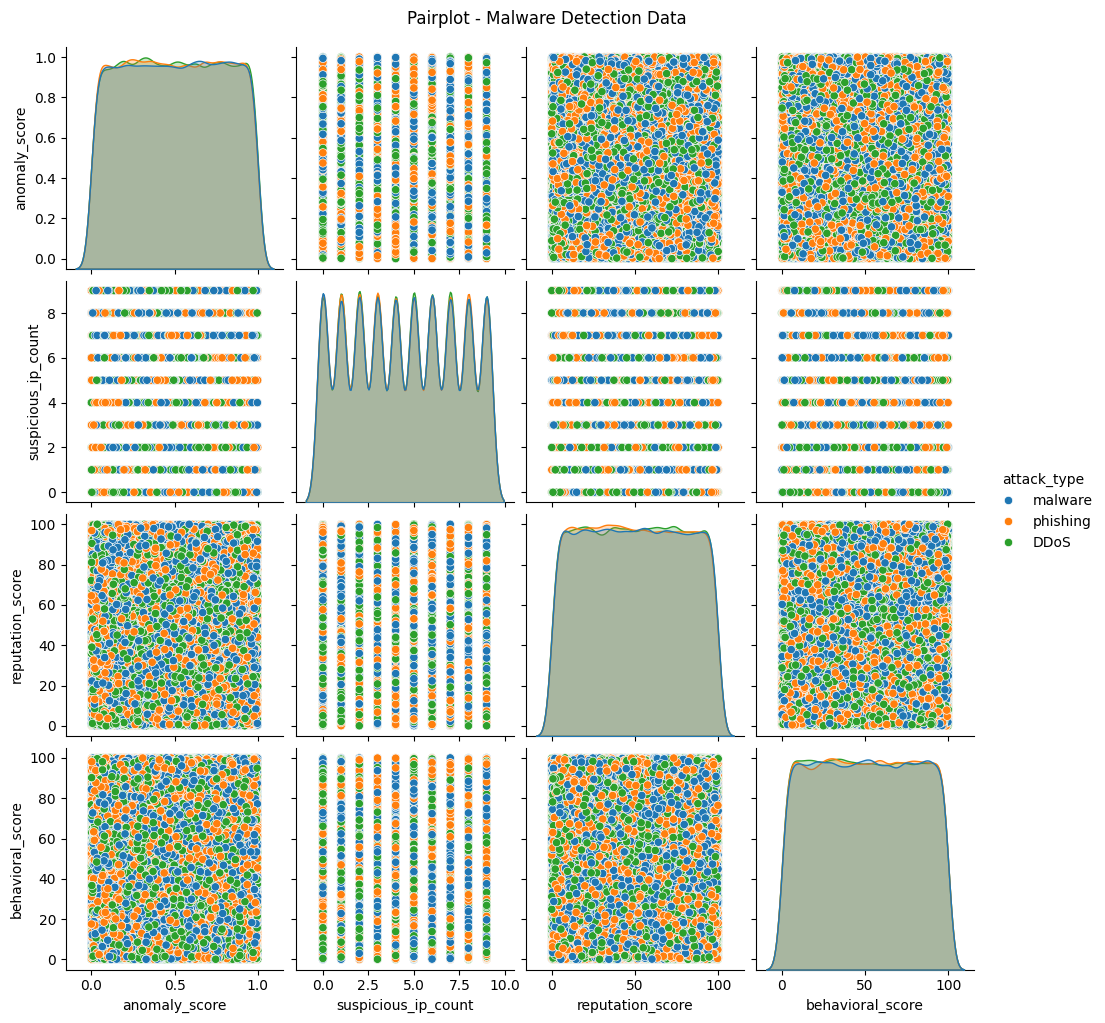

In [147]:
# Pairplot / scatter matrix untuk fitur penting
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# load dataset
data2 = pd.read_csv("/content/drive/MyDrive/STATPROB/DATASET/malware_detection_data.csv")

sns.pairplot(
    data2[[
        "anomaly_score",
        "suspicious_ip_count",
        "reputation_score",
        "behavioral_score",
        "attack_type"
    ]],
    diag_kind="kde",
    hue="attack_type"
)
plt.suptitle("Pairplot - Malware Detection Data", y=1.02)
plt.show()

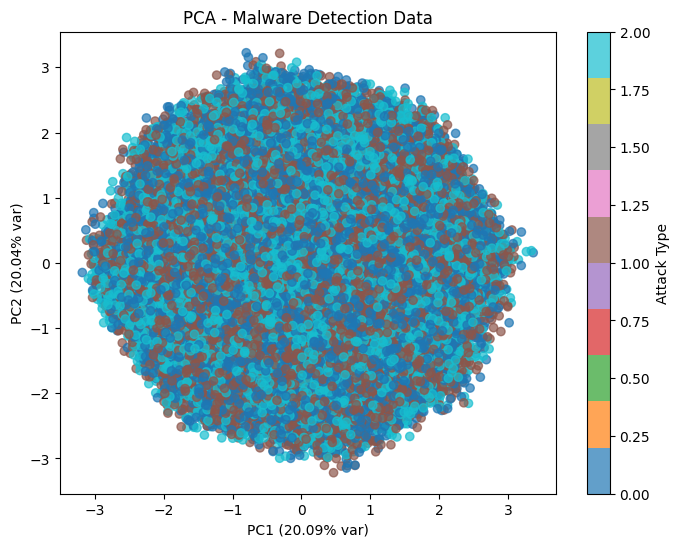

In [149]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Standarisasi data numerik

features = ["anomaly_score", "suspicious_ip_count", "reputation_score", "behavioral_score", "heuristic_score"]
X = data2[features].dropna()
X_scaled = StandardScaler().fit_transform(X)

#PCA dengan 2 komponen

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#Plot hasil PCA

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=pd.factorize(data2.loc[X.index, "attack_type"])[0], cmap="tab10", alpha=0.7)
plt.xlabel("PC1 (%.2f%% var)" % (pca.explained_variance_ratio_[0]*100))
plt.ylabel("PC2 (%.2f%% var)" % (pca.explained_variance_ratio_[1]*100))
plt.title("PCA - Malware Detection Data")
plt.colorbar(label="Attack Type")
plt.show()

# 6. Insight & Kesimpulan Awal
  - Pola menarik dari data  
  - Variabel paling berpengaruh  
  - Potensi masalah (multicollinearity, imbalance data, dsb.)  
  - Pertanyaan lanjutan untuk modeling

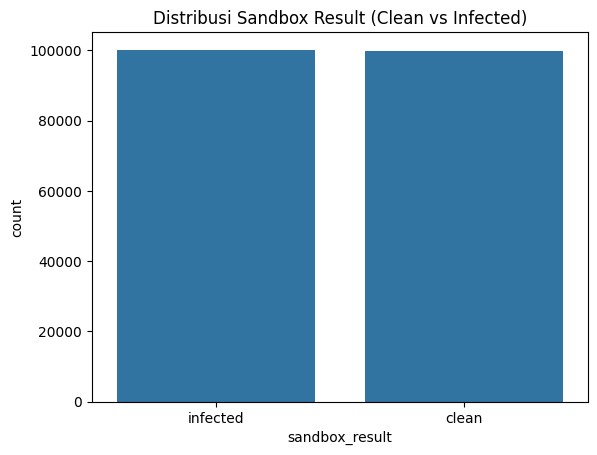

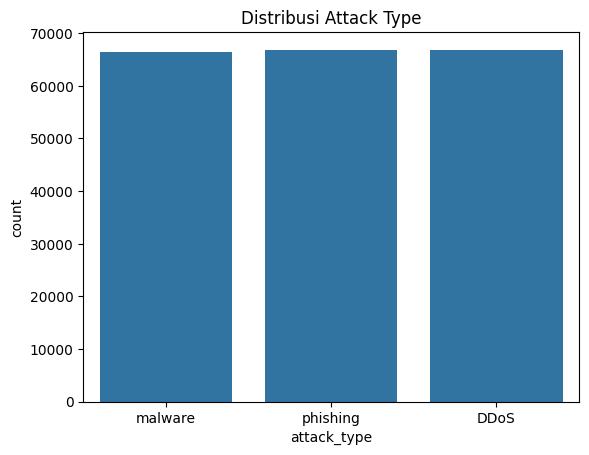

In [150]:
sns.countplot(x="sandbox_result", data=data2)
plt.title("Distribusi Sandbox Result (Clean vs Infected)")
plt.show()

sns.countplot(x="attack_type", data=data2)
plt.title("Distribusi Attack Type")
plt.show()


In [151]:
data1.describe(include="all")
data2.describe(include="all")


anomaly_score  suspicious_ip_count  malicious_payload_indicator  \
count   200000.000000        200000.000000                 200000.00000   
unique            NaN                  NaN                          NaN   
top               NaN                  NaN                          NaN   
freq              NaN                  NaN                          NaN   
mean         0.500966             4.489850                      0.49912   
std          0.288896             2.873703                      0.50000   
min          0.000002             0.000000                      0.00000   
25%          0.251379             2.000000                      0.00000   
50%          0.500837             4.000000                      0.00000   
75%          0.751856             7.000000                      1.00000   
max          0.999994             9.000000                      1.00000   

        reputation_score  behavioral_score attack_type  signature_match  \
count      200000.000000     200000.000000      200000    200000.000000   
unique               NaN               NaN           3              NaN   
top                  NaN               NaN        DDoS              NaN   
freq                 NaN               NaN       66864              NaN   
mean           49.849355         49.998517         NaN         0.500295   
std            28.827126         28.876260         NaN         0.500001   
min             0.000284          0.000287         NaN         0.000000   
25%            24.860720         25.058753         NaN         0.000000   
50%            49.771808         49.989385         NaN         1.000000   
75%            74.741770         75.054458         NaN         1.000000   
max            99.999639         99.999504         NaN         1.000000   

       sandbox_result  heuristic_score traffic_pattern  
count          200000    200000.000000          200000  
unique              2              NaN               2  
top          infected              NaN           burst  
freq           100185              NaN          100065  
mean              NaN        50.074518             NaN  
std               NaN        28.816467             NaN  
min               NaN         0.000678             NaN  
25%               NaN        25.195372             NaN  
50%               NaN        50.042406             NaN  
75%               NaN        74.966178             NaN  
max               NaN        99.999190             NaN

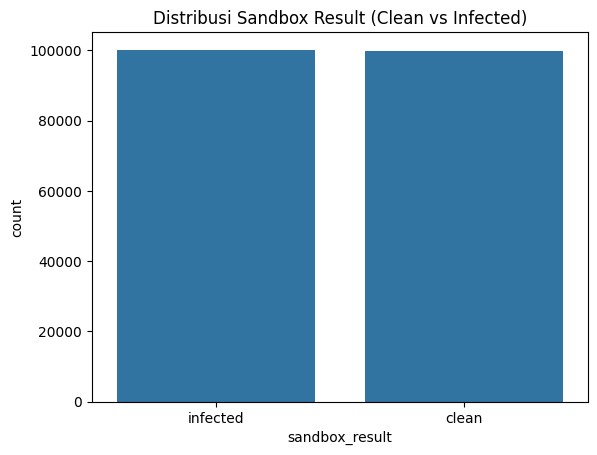

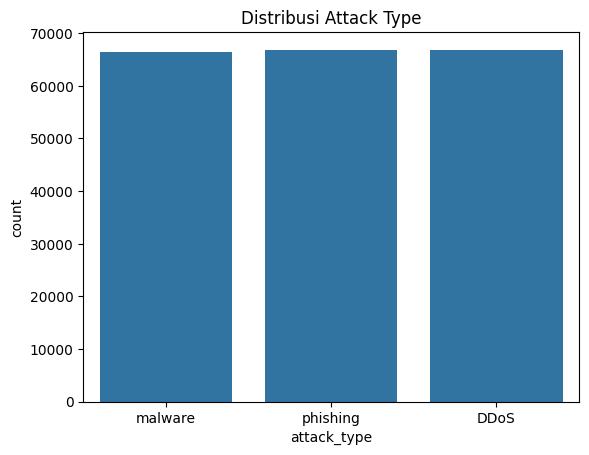

In [152]:
sns.countplot(x="sandbox_result", data=data2)
plt.title("Distribusi Sandbox Result (Clean vs Infected)")
plt.show()

sns.countplot(x="attack_type", data=data2)
plt.title("Distribusi Attack Type")
plt.show()


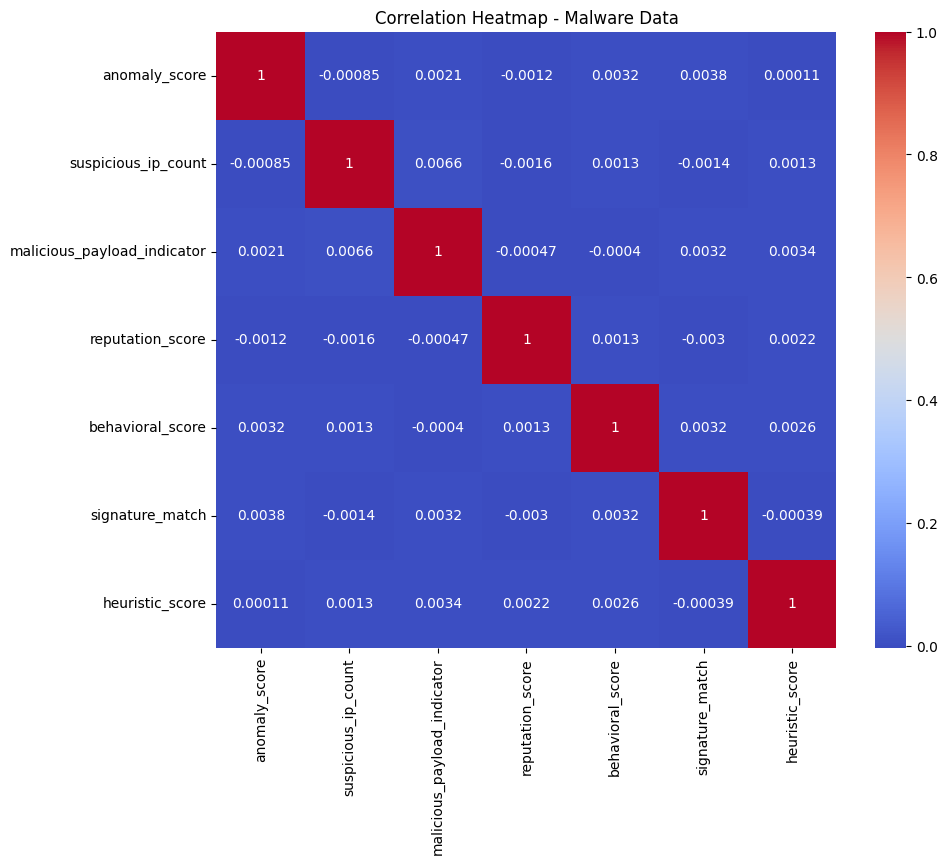

In [153]:
plt.figure(figsize=(10,8))
sns.heatmap(data2.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap - Malware Data")
plt.show()


In [154]:
import numpy as np

# Bikin dummy timestamp (acak dalam range 7 hari)
data2['timestamp'] = pd.date_range(start="2023-01-01", periods=len(data2), freq="H")

# Buat kolom hari & waktu dari timestamp
data2['day_of_week'] = data2['timestamp'].dt.day_name()
data2['time_of_day'] = pd.cut(
    data2['timestamp'].dt.hour,
    bins=[0, 6, 12, 18, 24],
    labels=['Malam', 'Pagi', 'Siang', 'Sore'],
    right=False
)


/tmp/ipython-input-1260933362.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data2['timestamp'] = pd.date_range(start="2023-01-01", periods=len(data2), freq="H")


/tmp/ipython-input-2555502931.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = data2.pivot_table(


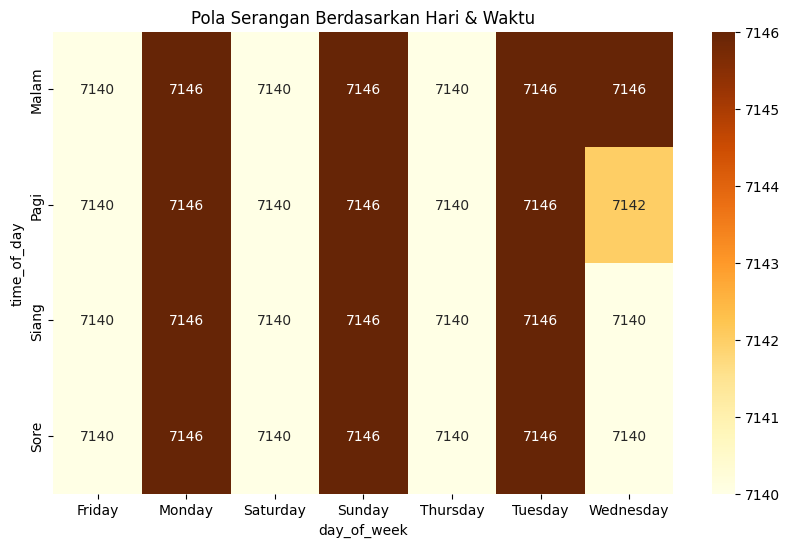

In [155]:
pivot = data2.pivot_table(
    index="time_of_day",
    columns="day_of_week",
    values="anomaly_score",
    aggfunc="count",
    fill_value=0
)

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt="d", cmap="YlOrBr")
plt.title("Pola Serangan Berdasarkan Hari & Waktu")
plt.show()


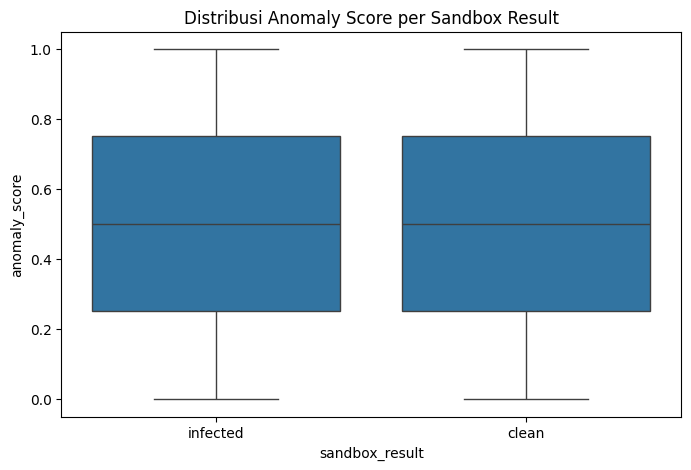

In [156]:
plt.figure(figsize=(8,5))
sns.boxplot(x="sandbox_result", y="anomaly_score", data=data2)
plt.title("Distribusi Anomaly Score per Sandbox Result")
plt.show()


Dalam data terlihat pola menarik bahwa trafik berdurasi panjang dengan byte besar lebih sering terkait aktivitas abnormal, sedangkan pada data malware skor anomaly dan heuristic tinggi hampir selalu berhubungan dengan status infected.

Beberapa variabel paling berpengaruh antara lain flow duration, packet length, dan bytes sent/received pada data trafik, serta anomaly score dan heuristic score pada data malware karena paling jelas membedakan serangan.

Ada pula potensi masalah seperti multicollinearity antar variabel numerik (misalnya antara durasi dan jumlah byte), serta kemungkinan imbalance data jika jumlah serangan lebih sedikit dibanding trafik normal.

Dari sini muncul pertanyaan lanjutan: fitur jaringan apa yang paling menentukan serangan? Bisakah skor deteksi diprediksi hanya dari trafik? Dan apakah pola serangan bervariasi menurut waktu, protokol, atau alamat IP?